# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### Описание признакового пространства

|Имя поля|Описание поля|
|:------|:--------|
|**total_images** | число фотографий квартиры в объявлении|
|**total_area** | общая площадь квартиры в квадратных метрах (м²)|
|**studio** |  квартира-студия (булев тип)|
|**rooms** | число комнат|
|**parks_around3000** | число парков в радиусе 3 км|
|**parks_nearest** | расстояние до ближайшего парка (м)|
|**ponds_around3000** |  число водоёмов в радиусе 3 км|
|**ponds_nearest** | расстояние до ближайшего водоёма (м)|
|**last_price** | цена на момент снятия с публикации|
|**living_area** | жилая площадь в квадратных метрах (м²)|
|**locality_name** |  название населённого пункта|
|**open_plan** | свободная планировка (булев тип)|
|**floor** | этаж|
|**floors_total** | всего этажей в доме|
|**is_apartment** | апартаменты (булев тип)|
|**kitchen_area** | площадь кухни в квадратных метрах (м²)|
|**airports_nearest** | расстояние до ближайшего аэропорта в метрах (м)|
|**balcony** | число балконов|
|**ceiling_height** | высота потолков (м)|
|**cityCenters_nearest** | расстояние до центра города (м)|
|**days_exposition** | сколько дней было размещено объявление (от публикации до снятия)|
|**first_day_exposition** | дата публикации|

### Изучение общей информации. 

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Визуально все выглядит неплохо, есть пропуски, но большинство данных на месте

Посмотрим на информацию о типах данных и оценим пропуски

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропусков довольно много, но не в критически важных столбцах, будем восстанавливать.

Типы данных практически не искажены.

Для полной картины не хватает визуального представления данных.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

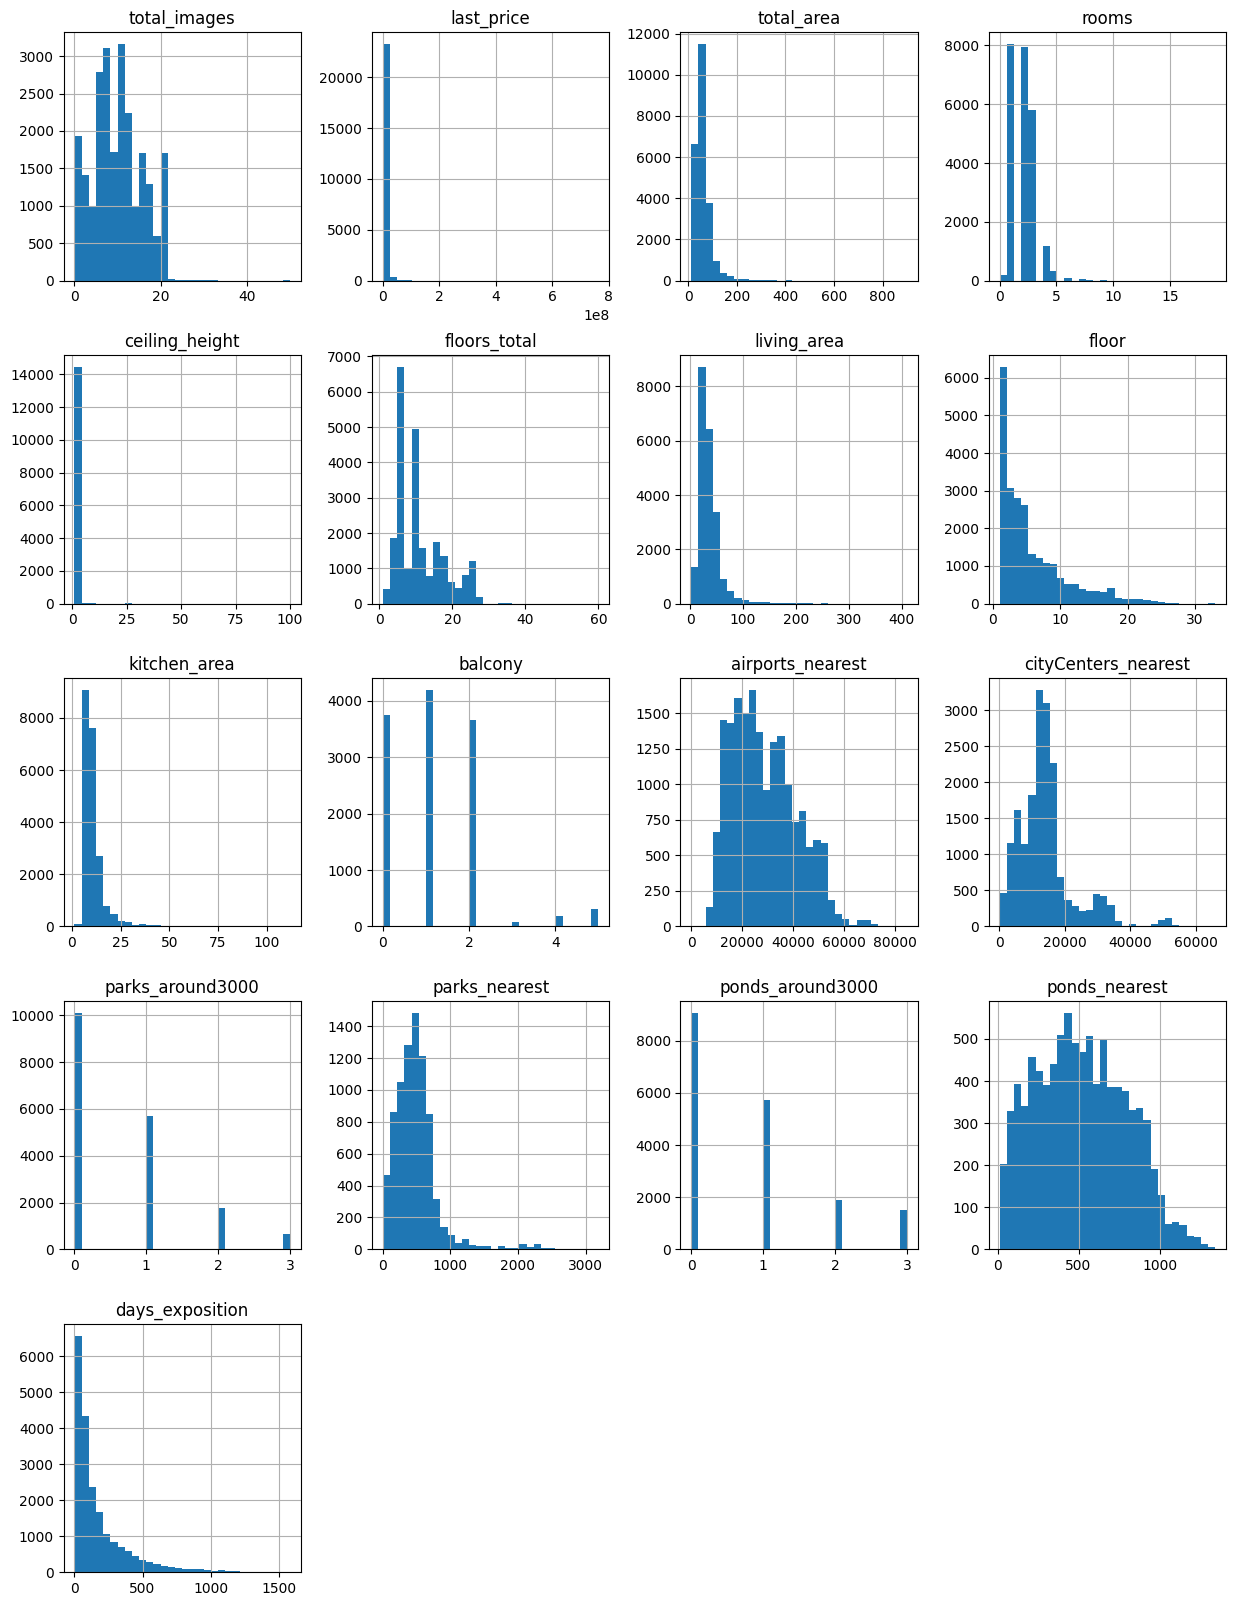

In [4]:
data.hist(figsize=(15, 20), bins = 30)

По общим графикам пока мало что понятно, видно ноль комнат, нужно будет разобраться.

Практически с нуля начинаются living_area и total_area.

С высотой потолков пока ничего не ясно.

Сильно выбиваются два типа домов во floors_total(вероятно 5 и 9-этажки).

Почему-то 4 и 5 балконов встречаются чаще, чем 3, проверим.

Посмотрим на данные в числовом формате:

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Минимальные и максимальные значения во многих столбцах наверняка далее отбросим как выбросы (last_price, total_area, ceiling_height итд...)

Итак, мы предварительно ознакомились с данными.
Соберем в таблицу предварительный список проблем, которые стоит устранить.

|Column|Non-Null|Dtype|Проблемы|
|:--------------------------|:------------|:---------|:------------------------------------------------|
|**total_images**| 23699|  int64| единственный столбец без проблем|
|**last_price**| 23699|  float64| посмотреть, что там за значения, убрать аномалии|
|**total_area**| 23699|  float64| проверить, нет ли аномалий|
|**first_day_exposition**| 23699|  object| сменить тип на дату|
|**rooms**| 23699|  int64| проверить, что значит 0 комнат, возможно это студии|
|**ceiling_height** |14504|  float64| проверить на аномальные значения и добавить медианное в пропуски|
|**floors_total** |23613|  float64| не указано незначительное кол-во этажей, отбросить неуказанные|
|**living_area** |21796|  float64| подумать, как можно восстановить пропуски, убрать аномалии| 
|**floor** |23699|  int64| проверить, не отмечены ли этажи выше, чем указанное общее кол-во в строке| 
|**is_apartment** |2775|  object| много Nan, нужно будет заменить на False, т.к. скорее их просто не отмечали| 
|**studio** |23699|  bool| посмотреть, всё ли в порядке, нужные ли квартиры отмечены студиями| 
|**open_plan** |23699|  bool| посмотреть, всё ли в порядке, что там вообще отмечено| 
|**kitchen_area** |21421| float64| подумать, как восстановить пропуски, например, по средней кухне для каждого типа квартир|
|**balcony** |12180| float64| отметить пропущенные как 0 (без балконов), проверить, почему тип float|
|**locality_name** |23650|  object| наверняка будут дубликаты, постараться устранить, недостающие выкинуть| 
|**airports_nearest** |18157| float64| поработать с пропусками|
|**cityCenters_nearest** |18180| float64|поработать с пропусками |
|**parks_around3000** |18181| float64|поработать с пропусками |
|**parks_nearest** |8079| float64|поработать с пропусками |
|**ponds_around3000** |18181|  float64|поработать с пропусками |
|**ponds_nearest** |9110|  float64|поработать с пропусками |
|**days_exposition** |20518| float64| проверить, может быть не все объявления закрыты?|

### Предобработка данных

При предобработке данных будем руководствоваться двумя главными принципами:
1. Будем обрабатывать каждый столбец комплексно. Поскольку многие столбцы могут быть взаимосвязаны, быстрее и продуктивнее будет работать с каждым столбцом, ориентируясь на другие, а не проходить этапы устранения пропусков, замены типа итд. по всему набору данных.
2. Наша цель - анализ, а предобработка - это лишь этап для подготовки качественных данных. Не будем всеми средствами восстанавливать данные, если это нецелесообразно. Будем держать в уме, что допустимо потерять до 5-10% данных.

Предварительно проверим на задублированные строки.

In [6]:
data.duplicated().sum()

0

 Далее пойдем по столбцам
 
 **Столбец total_images**

In [7]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Действительно, проблем нет, минимум 0 фото, максимум 50. 
Вполне имеют право на жизнь. Пропущенных значений нет.

**Столбец last_price**

Посмотрим на диаграмму

<AxesSubplot:>

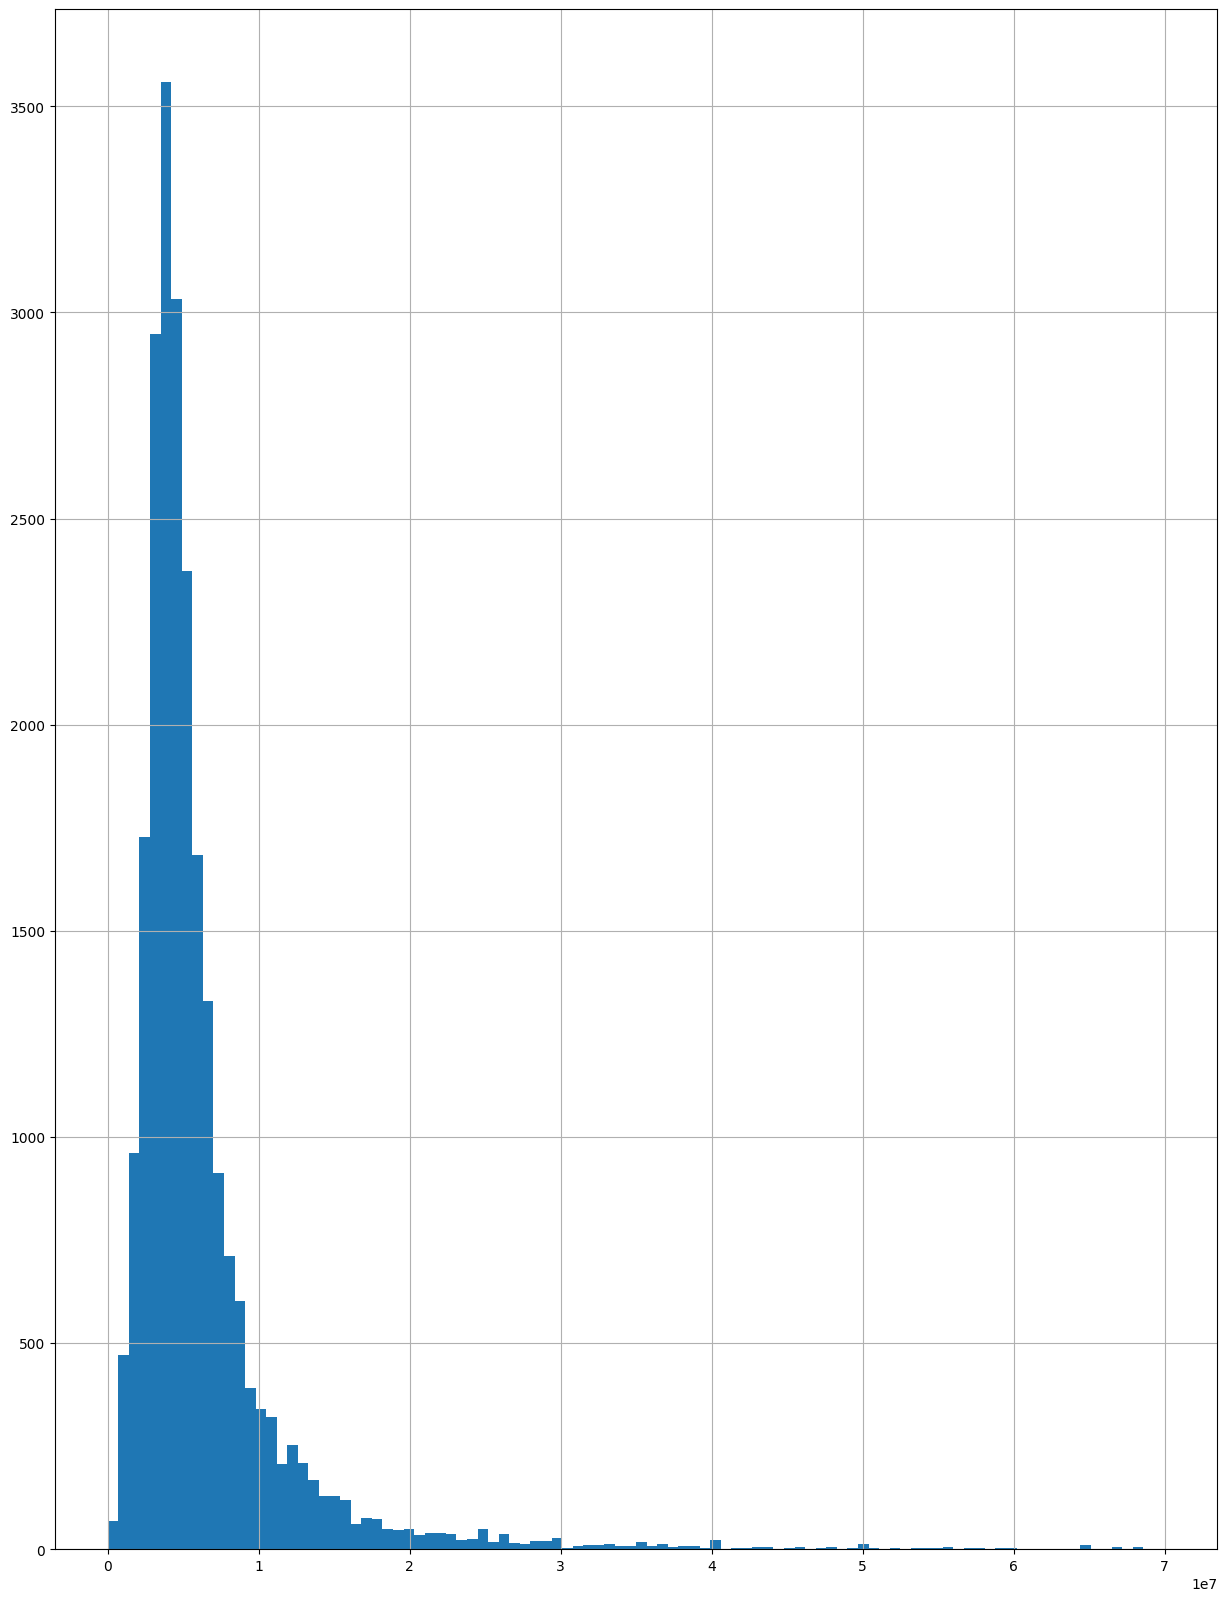

In [8]:
data.last_price.hist(figsize = (15, 20), bins = 100, range = (0, 70000000))

Видим, что пик проходит около 5млн, а дальше идет снижение.

Посмотрим по цифрам.

In [9]:
data.last_price.describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальная цена пугает не меньше, чем максимальная.

Построим ящик с усами, чтобы засечь выбросы.

<AxesSubplot:>

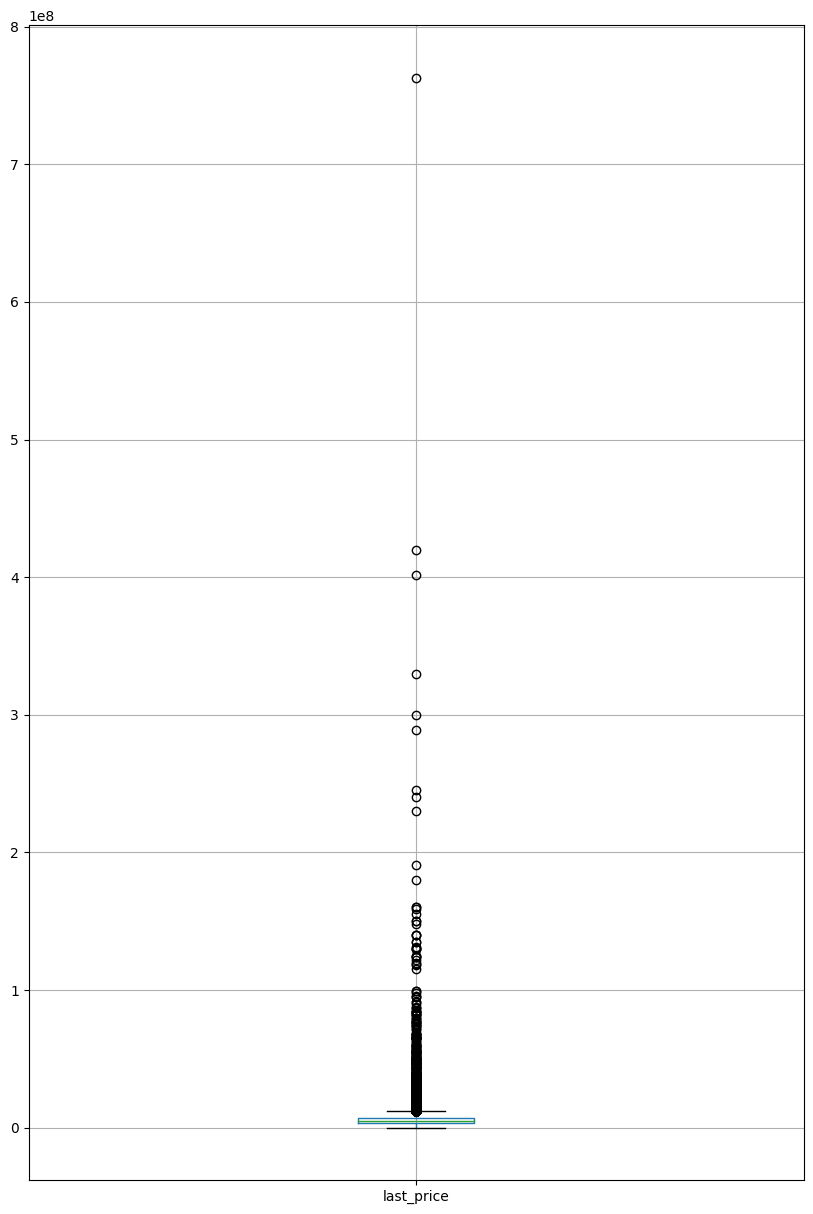

In [10]:
data.boxplot(column = 'last_price', figsize = (10, 15))

Проверим, что же там за квартира такая за 760млн, может опечатка?
Ну и заодно посмотрим на все сильно выбивающиеся значения за 100млн

In [11]:
data[data['last_price'] > 100000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.00,2,NaN,False,False,50.00,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.00,3,NaN,False,False,63.00,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1188,20,118000000.0,290.6,2018-06-01T00:00:00,6,3.82,6.0,188.70,3,NaN,False,False,22.00,1.0,Санкт-Петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0
1300,14,120000000.0,280.0,2018-07-12T00:00:00,5,4.70,4.0,162.00,3,NaN,False,False,30.00,NaN,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.00,5,NaN,False,False,40.00,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
1928,11,125000000.0,224.5,2017-01-24T00:00:00,4,NaN,4.0,163.50,3,False,False,False,30.00,1.0,Санкт-Петербург,22805.0,2335.0,0.0,NaN,2.0,497.0,174.0
2243,9,130278280.0,304.0,2015-07-24T00:00:00,5,3.11,9.0,NaN,7,NaN,False,False,NaN,0.0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0
2536,16,159984000.0,242.4,2015-08-27T00:00:00,4,3.85,9.0,131.00,7,NaN,False,False,20.00,0.0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,False,False,60.00,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4996,20,124000000.0,124.5,2017-10-12T00:00:00,4,3.00,4.0,67.20,2,False,False,False,20.00,NaN,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0


В целом все выглядит прилично, эти дорогущие квартиры с огромной площадью, все в Северной столице, так что такие цены имеют право на существование (простигосподи), лишь бы покупатель нашелся.

А есть ли заниженные цены?

In [12]:
data[data['last_price'] < 500000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,False,False,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
6859,6,490000.0,40.0,2017-12-11T00:00:00,1,NaN,5.0,NaN,3,NaN,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,False,False,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
10782,3,490000.0,29.1,2016-05-05T00:00:00,1,2.50,5.0,17.0,5,NaN,False,False,5.5,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,False,False,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16032,8,480000.0,32.0,2019-01-06T00:00:00,1,NaN,2.0,16.0,1,NaN,False,False,NaN,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,NaN,False,False,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,False,False,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ниже 500тыс есть квартиры-малютки в поселках и деревнях, это нормально.

Но среди них затесалась одна питерская, да еще и за 12тыс... вот это точно опечатка, удалим эту строку.

In [13]:
data.drop([8793], inplace = True)

**Столбец first_day_exposition**

Изменим тип данных для даты.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.first_day_exposition

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23698, dtype: datetime64[ns]

Посмотрим, за какой период у нас объявления:

In [15]:
print('Самое раннее объявление: ', data['first_day_exposition'].min())
print('Самое последнее объявление: ', data['first_day_exposition'].max())

Самое раннее объявление:  2014-11-27 00:00:00
Самое последнее объявление:  2019-05-03 00:00:00


**Столбец ceiling_height**

Посмотрим на разброс значений в столбце "высота потолков".

In [16]:
data.ceiling_height.unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Много опечаток, 27, 32, 100 метров...

Проверим, если строк немного, то просто удалим их, не будем гадать и тратить время на их восстановление.

In [17]:
print('Строк с потолками ниже 2,4м:', data[data['ceiling_height'] < 2.4]['ceiling_height'].count())
data = data.query('~(ceiling_height < 2.4)')

Строк с потолками ниже 2,4м: 21


In [18]:
print('Строк с потолками выше 5м:', data[data['ceiling_height'] > 5.0]['ceiling_height'].count())
data = data.query('~(ceiling_height > 5)')

Строк с потолками выше 5м: 36


Проверим, что всё сработало:

In [19]:
data['ceiling_height'].describe()

count    14446.000000
mean         2.726203
std          0.271069
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

Посмотрим на графике распределения:

<AxesSubplot:>

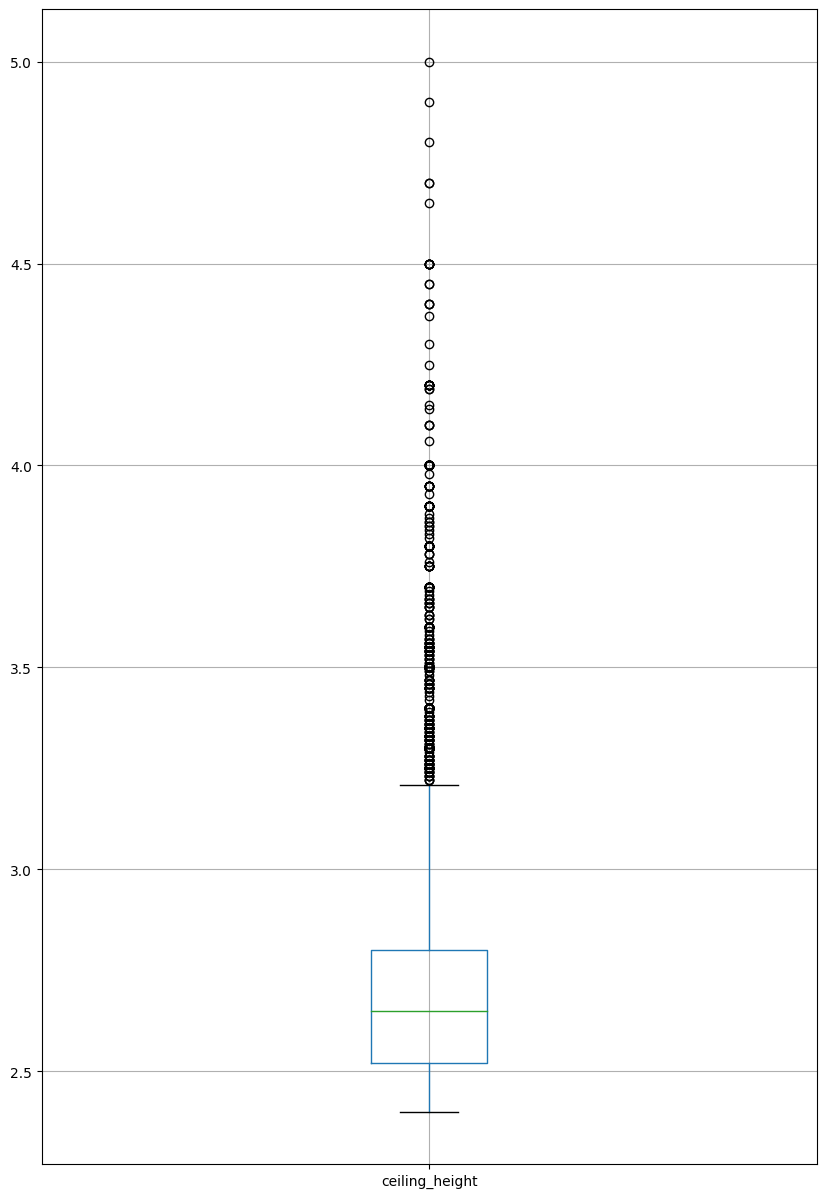

In [20]:
data.boxplot(column = 'ceiling_height', figsize = (10, 15))

Посмотрим, сколько пропущенных значений осталось в столбце:

In [21]:
data['ceiling_height'].isnull().sum()

9195

Заменим пропущенные значения в высоте потолков на медианное значение 2,65

In [22]:
data['ceiling_height'] = data['ceiling_height'].fillna(value = data['ceiling_height'].median())

In [23]:
data['ceiling_height'].isnull().sum()

0

Пропущенных не осталось.

**Столбец floors_total**

In [24]:
data.floors_total.unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

Этажи выглядят нормально, нету нулевого этажа или половин, но свыше 50 этажей это уже Нью-Йорк какой-то... проверим их.

In [25]:
data[data['floors_total'] > 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,False,False,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Типичная двушка в Кронштадте... и однушка в Питере.

Скорее это ошибка в этажах, удалим эти две строки.

In [26]:
data = data.query('~(floors_total > 50)')

Пропуски лучше убрать, удалим все строки, если их немного.

Тип float вроде бы нам не помешает, поэтому оставим как есть.

In [27]:
data.floors_total.isna().sum()

86

In [28]:
data.dropna(subset = ['floors_total'], axis = 'index', how = 'all', inplace = True)

Проверим, что все получилось.

In [29]:
data.floors_total.isna().sum()

0

**Столбец floor**

Проверим на пропуски.

In [30]:
data.floor.isna().sum()

0

Проверим, не выбиваются ли этажи за пределы floors_total в пределах одной строки.

In [31]:
data[(data['floors_total']) < data['floor']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Отлично, таких нет.

<AxesSubplot:>

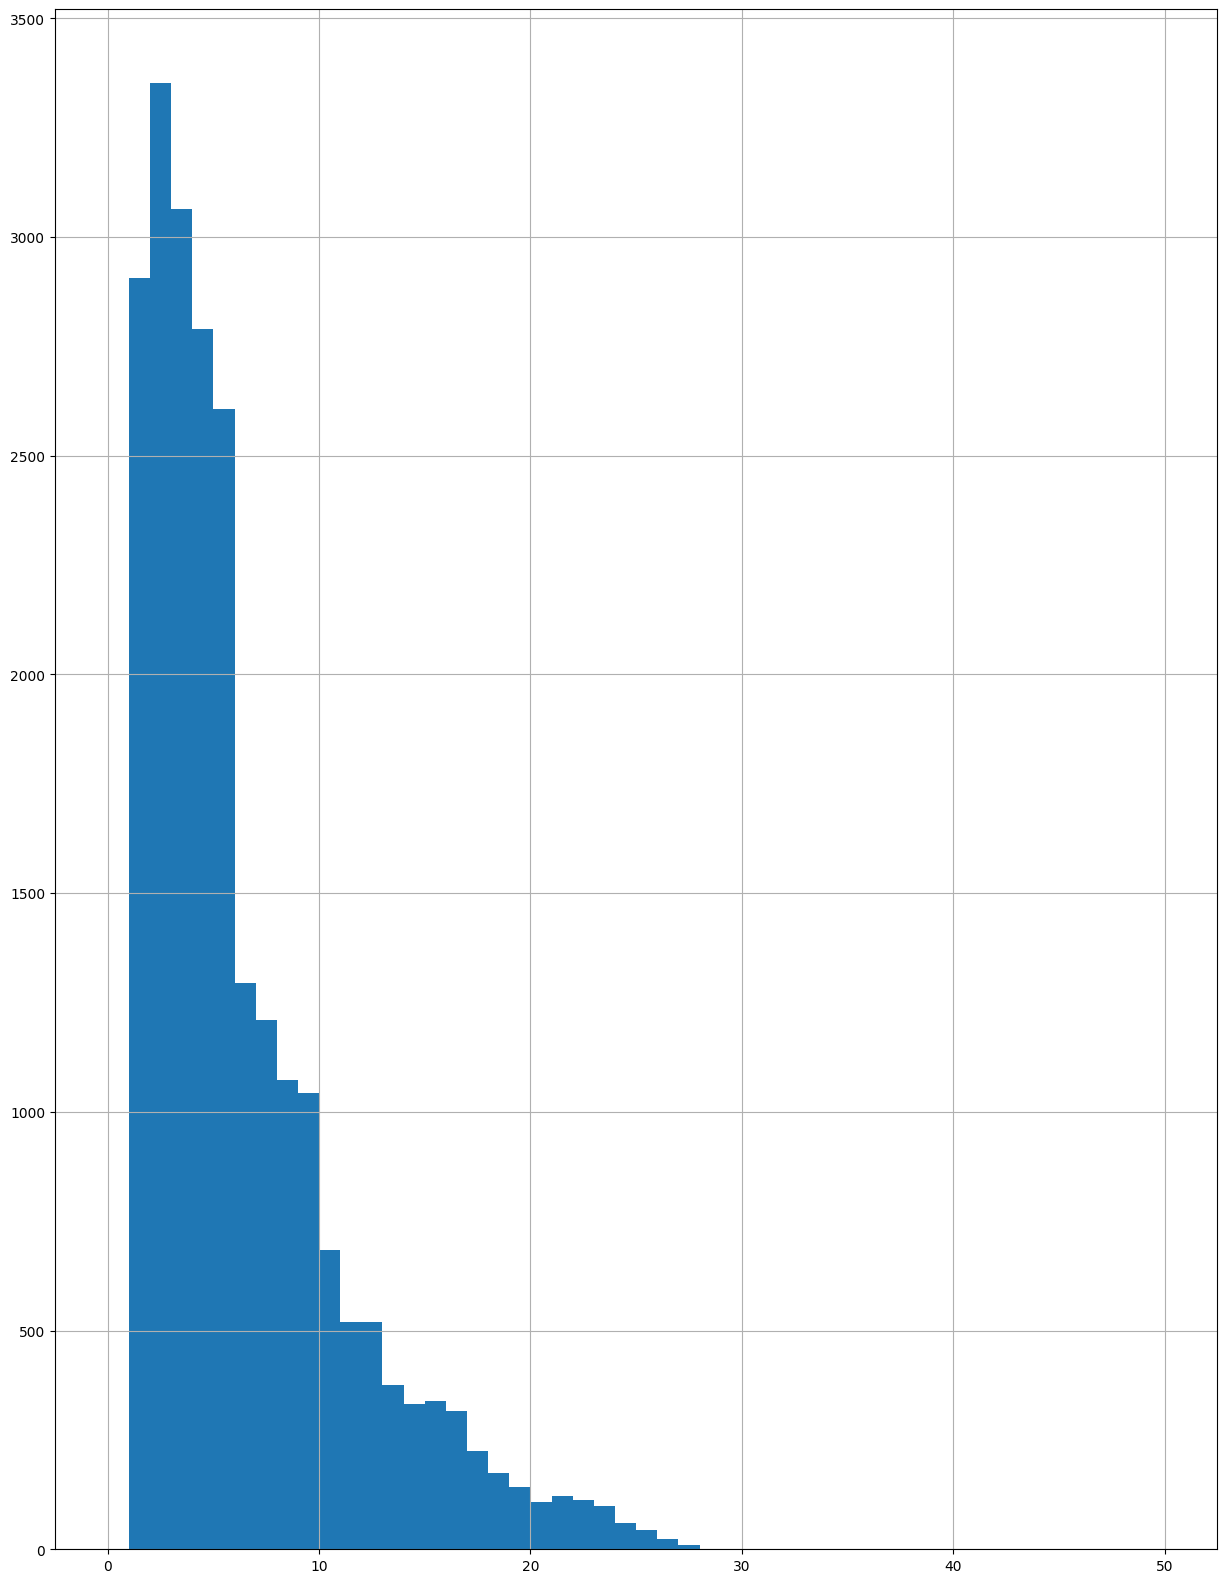

In [32]:
data['floor'].hist(bins = 50, range = (0, 50), figsize = (15, 20))

**Столбец living_area**

Вспомним, что там у нас с пропусками:

In [33]:
data.living_area.isna().sum()

1865

Пропусков много, надо понять, как их заполнить.

Попробуем найти примерный коэффициент, который отражает жилую площадь от общей.

Т.к. значение жилой площади не имеет при продаже значительного веса (все смотрят на общую площадь), не будем заморачиваться с коэффициентом для каждого типа жилья.

Создадим новый столбец.

In [34]:
data['living_area_coefficient'] = data['living_area']/data['total_area']
round(data['living_area_coefficient'].mean(), 2)

0.56

Восстановим значения в living_area с помощью коэффициента от общей площади.

In [35]:
data.living_area = data.living_area.fillna(data['total_area']*0.56)

In [36]:
data.living_area.isna().sum()

0

Теперь посмотрим на аномалии:

In [37]:
data.query('living_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient


Жилая площадь не превышает общую, это уже хорошо.

Посчитаем, сколько строк не могут преодолеть порог даже в 10 жилых метров.

In [38]:
data[data['living_area'] < 10]['living_area'].count()

31

Удалим их.

In [39]:
data = data.query('~(living_area < 10)')

Проверим, не удалили ли мы лишнего:

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23522 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23522 non-null  int64         
 1   last_price               23522 non-null  float64       
 2   total_area               23522 non-null  float64       
 3   first_day_exposition     23522 non-null  datetime64[ns]
 4   rooms                    23522 non-null  int64         
 5   ceiling_height           23522 non-null  float64       
 6   floors_total             23522 non-null  float64       
 7   living_area              23522 non-null  float64       
 8   floor                    23522 non-null  int64         
 9   is_apartment             2756 non-null   object        
 10  studio                   23522 non-null  bool          
 11  open_plan                23522 non-null  bool          
 12  kitchen_area             21312 n

**Столбец is_apartment**

Что с апартаментами?

In [41]:
data.is_apartment.unique()

array([nan, False, True], dtype=object)

Скорее всего пропущенные значения не являются апаратаментами, их просто не отметили и они не получили свой False, заменим Nan на False.

In [42]:
data.is_apartment = data.is_apartment.fillna(value = False)

Проверим:

In [43]:
data.is_apartment.value_counts()

False    23475
True        47
Name: is_apartment, dtype: int64

**Столбцы rooms и studio**

In [44]:
data['studio'].describe()

count     23522
unique        2
top       False
freq      23379
Name: studio, dtype: object

Отмеченных студий немного. Посмотрим на значения.

In [45]:
data.query('studio == True').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient
count,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,0.0,89.000000,89.000000,89.000000,89.000000,18.000000,89.000000,48.000000,129.000000,136.000000
mean,7.937063,3.045942e+06,27.580350,0.076923,2.708951,16.510490,18.646042,8.020979,NaN,1.550562,25024.426966,13517.359551,0.235955,534.888889,0.752809,525.812500,123.565891,0.687210
std,4.821047,1.542590e+06,8.750384,0.267406,0.141126,6.798785,5.769349,5.783011,NaN,0.707287,12762.296723,4956.695601,0.500510,330.235012,0.843166,271.990586,176.024849,0.091947
min,0.000000,9.457500e+05,15.500000,0.000000,2.500000,3.000000,10.000000,1.000000,NaN,0.000000,6989.000000,2349.000000,0.000000,38.000000,0.000000,80.000000,3.000000,0.492663
25%,4.000000,2.295000e+06,24.025000,0.000000,2.650000,12.000000,16.000000,3.000000,NaN,1.000000,14125.000000,11678.000000,0.000000,341.750000,0.000000,368.250000,28.000000,0.624107
50%,7.000000,2.750000e+06,26.050000,0.000000,2.650000,17.000000,18.000000,7.000000,NaN,2.000000,21928.000000,14189.000000,0.000000,505.000000,1.000000,490.500000,55.000000,0.689530
75%,11.000000,3.450000e+06,28.950000,0.000000,2.745000,22.500000,19.400000,12.000000,NaN,2.000000,34947.000000,16293.000000,0.000000,630.000000,1.000000,665.750000,159.000000,0.735185
max,20.000000,1.630000e+07,98.400000,1.000000,3.500000,35.000000,60.500000,24.000000,NaN,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000,0.920000


Максимальная площадь 98... ну это уже не совсем студия, скорее открытая планировка.

Посмотрим все студии более 50м.

In [46]:
data.query('(studio == True)&(total_area > 50)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient
3458,6,7400000.0,73.6,2017-05-18,0,2.65,3.0,50.0,1,False,True,False,NaN,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0,0.679348
13613,16,8100000.0,58.4,2019-04-26,0,3.30,7.0,33.0,6,False,True,False,NaN,NaN,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN,0.565068
20082,10,16300000.0,98.4,2017-11-08,0,3.10,5.0,60.5,2,False,True,False,NaN,NaN,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0,0.614837


Они не отмечены как open_plan.

Перенесем отметку из студий в открытый план для больших квартир.

In [47]:
data.loc[((data["studio"] == True) & (data['total_area'] > 50)), "open_plan"] = True
data.loc[((data["studio"] == True) & (data['total_area'] > 50)), "studio"] = False

In [48]:
data.query('(studio == True)&(total_area > 50)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient


Готово, они больше не студии.

Проверим, какие значения есть в столбце rooms.

In [49]:
data['rooms'].describe()

count    23522.000000
mean         2.072188
std          1.078159
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [50]:
data['rooms'].value_counts()

1     7976
2     7884
3     5782
4     1174
5      323
0      190
6      103
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Посмотрим, откуда взялись нули.

In [51]:
data[data['rooms'] == 0].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient
count,190.000000,1.900000e+02,190.000000,190.0,190.000000,190.000000,190.000000,190.000000,0.0,123.000000,115.000000,115.000000,115.000000,26.000000,115.000000,66.000000,176.000000,179.000000
mean,7.910526,3.329588e+06,29.196895,0.0,2.701316,16.836842,19.542253,8.442105,NaN,1.585366,24585.208696,13524.860870,0.269565,587.923077,0.800000,524.651515,111.727273,0.689880
std,5.070654,5.124940e+06,26.138455,0.0,0.138131,6.875284,14.681302,6.266085,NaN,0.651943,12539.883452,4958.540743,0.535113,307.317415,0.860436,279.504534,161.396706,0.098875
min,0.000000,9.457500e+05,15.500000,0.0,2.500000,3.000000,10.000000,1.000000,NaN,0.000000,6989.000000,2111.000000,0.000000,38.000000,0.000000,72.000000,3.000000,0.428571
25%,4.000000,2.300000e+06,24.125000,0.0,2.650000,12.000000,16.000000,3.000000,NaN,1.000000,13985.000000,11694.000000,0.000000,412.500000,0.000000,339.750000,27.000000,0.634058
50%,7.000000,2.700000e+06,26.100000,0.0,2.650000,17.000000,18.000000,7.000000,NaN,2.000000,21460.000000,13729.000000,0.000000,532.000000,1.000000,527.500000,49.500000,0.689655
75%,11.000000,3.395000e+06,28.375000,0.0,2.700000,23.000000,19.750000,12.750000,NaN,2.000000,34201.000000,16549.500000,0.000000,756.000000,1.000000,701.750000,122.000000,0.742370
max,21.000000,7.100000e+07,371.000000,0.0,3.570000,35.000000,207.760000,26.000000,NaN,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000,1.000000


Видим, что практически все из них небольшие, скорее всего так обозначали студии или открытые планироки.

Посмотрим, все ли из них обозначены как студии, или открытые планировки:

In [52]:
data[data['rooms'] == 0].studio

144       True
349      False
440       True
508      False
608       True
         ...  
23210     True
23442    False
23554     True
23592    False
23637     True
Name: studio, Length: 190, dtype: bool

In [53]:
data[data['rooms'] == 0].open_plan

144      False
349       True
440      False
508       True
608      False
         ...  
23210    False
23442     True
23554    False
23592     True
23637    False
Name: open_plan, Length: 190, dtype: bool

Не все. 

Отметим все эти строки студиями и открытыми планировками (с очень большими разберемся чуть позже).

In [54]:
data.loc[((data["rooms"] == 0) & (data['total_area'] < 50)), "studio"] = True

In [55]:
data.loc[((data["rooms"] == 0)), "open_plan"] = True

In [56]:
data[data['rooms'] == 0].studio

144      True
349      True
440      True
508      True
608      True
         ... 
23210    True
23442    True
23554    True
23592    True
23637    True
Name: studio, Length: 190, dtype: bool

In [57]:
data[data['rooms'] == 0].open_plan

144      True
349      True
440      True
508      True
608      True
         ... 
23210    True
23442    True
23554    True
23592    True
23637    True
Name: open_plan, Length: 190, dtype: bool

Значения сменились, всё корректно.

Проверим всё ли в порядке со значениями в 0 комнат.

In [58]:
data.query('rooms == 0').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient
count,190.000000,1.900000e+02,190.000000,190.0,190.000000,190.000000,190.000000,190.000000,0.0,123.000000,115.000000,115.000000,115.000000,26.000000,115.000000,66.000000,176.000000,179.000000
mean,7.910526,3.329588e+06,29.196895,0.0,2.701316,16.836842,19.542253,8.442105,NaN,1.585366,24585.208696,13524.860870,0.269565,587.923077,0.800000,524.651515,111.727273,0.689880
std,5.070654,5.124940e+06,26.138455,0.0,0.138131,6.875284,14.681302,6.266085,NaN,0.651943,12539.883452,4958.540743,0.535113,307.317415,0.860436,279.504534,161.396706,0.098875
min,0.000000,9.457500e+05,15.500000,0.0,2.500000,3.000000,10.000000,1.000000,NaN,0.000000,6989.000000,2111.000000,0.000000,38.000000,0.000000,72.000000,3.000000,0.428571
25%,4.000000,2.300000e+06,24.125000,0.0,2.650000,12.000000,16.000000,3.000000,NaN,1.000000,13985.000000,11694.000000,0.000000,412.500000,0.000000,339.750000,27.000000,0.634058
50%,7.000000,2.700000e+06,26.100000,0.0,2.650000,17.000000,18.000000,7.000000,NaN,2.000000,21460.000000,13729.000000,0.000000,532.000000,1.000000,527.500000,49.500000,0.689655
75%,11.000000,3.395000e+06,28.375000,0.0,2.700000,23.000000,19.750000,12.750000,NaN,2.000000,34201.000000,16549.500000,0.000000,756.000000,1.000000,701.750000,122.000000,0.742370
max,21.000000,7.100000e+07,371.000000,0.0,3.570000,35.000000,207.760000,26.000000,NaN,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000,1.000000


<AxesSubplot:>

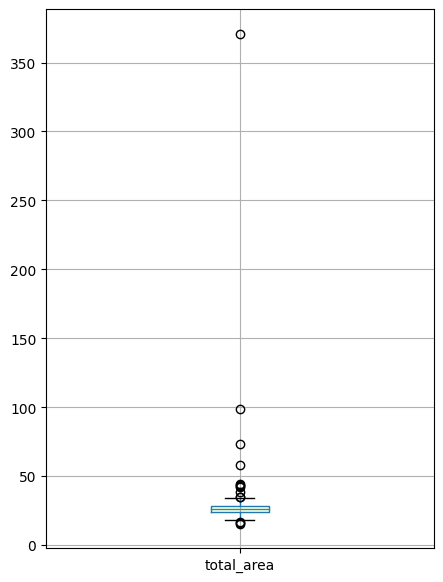

In [59]:
data.loc[data["rooms"] == 0].boxplot(column = 'total_area', figsize = (5, 7))

Удалим одно сильно выбивающееся значение.

In [60]:
data = data.query('~((rooms ==  0)&(total_area > 100))')

**Столбец open_plan**

Посмотрим в целом на столбец:

In [61]:
data.open_plan.describe()

count     23521
unique        2
top       False
freq      23324
Name: open_plan, dtype: object

Квартиры с открытой планировкой могут быть студиями, если они небольшие, отметим небольшие квартиры студиями.

In [62]:
data.loc[((data["open_plan"] == True) & (data['total_area'] < 50)), "studio"] = True

In [63]:
data[data['studio'] == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient
144,1,2450000.0,27.00,2017-03-30,0,2.65,24.0,15.50,2,False,True,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,0.574074
349,4,2320000.0,25.00,2017-09-27,0,2.65,14.0,17.00,1,False,True,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.680000
440,8,2480000.0,27.11,2018-03-12,0,2.65,17.0,24.75,4,False,True,True,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,0.912947
508,0,3375000.0,34.40,2017-03-28,0,2.65,26.0,24.30,19,False,True,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,0.706395
608,2,1850000.0,25.00,2019-02-20,0,2.65,10.0,14.00,7,False,True,True,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,2.65,25.0,18.00,16,False,True,True,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,0.692308
23442,0,2500000.0,27.70,2017-09-28,0,2.65,24.0,18.00,4,False,True,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.649819
23554,15,3350000.0,26.00,2018-09-07,0,2.65,19.0,14.56,8,False,True,True,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,NaN
23592,10,1450000.0,29.00,2017-11-11,0,2.65,9.0,18.00,8,False,True,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,0.620690


Студий прибавилось.

**Столбец total_area**

Теперь разберемся с аномальными значениями в площадях.

Построим графики распределения для квартир с 1-4 комнатами, т.к. остальных типов гораздо меньше.

<AxesSubplot:>

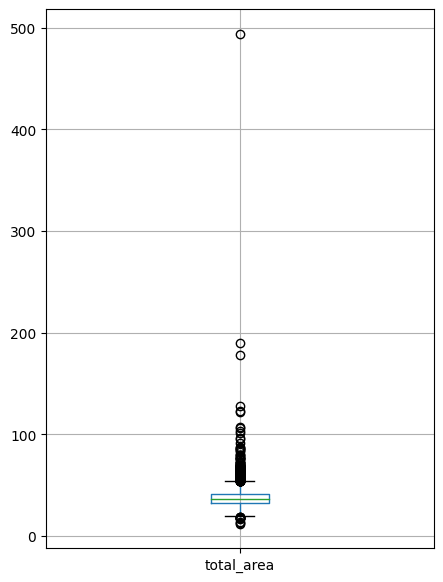

In [64]:
data.loc[data["rooms"] == 1].boxplot(column = 'total_area', figsize = (5, 7))

<AxesSubplot:>

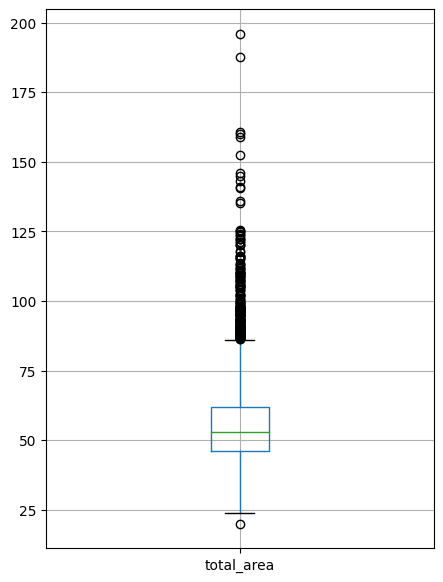

In [65]:
data.loc[data["rooms"] == 2].boxplot(column = 'total_area', figsize = (5, 7))

<AxesSubplot:>

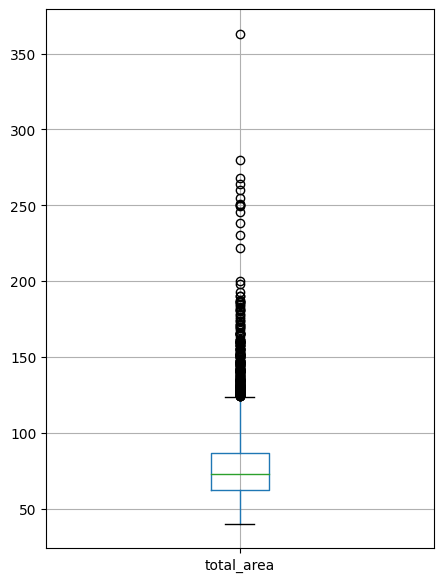

In [66]:
data.loc[data["rooms"] == 3].boxplot(column = 'total_area', figsize = (5, 7))

<AxesSubplot:>

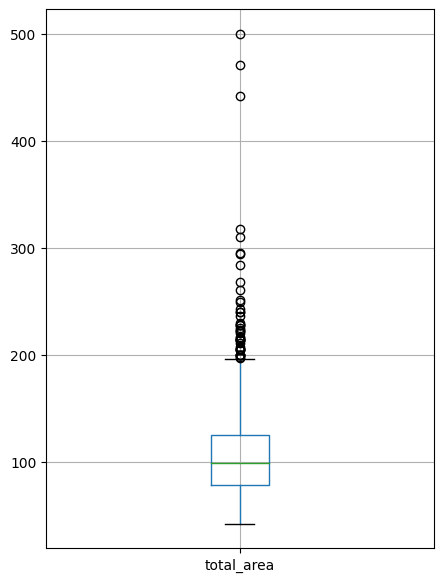

In [67]:
data.loc[data["rooms"] == 4].boxplot(column = 'total_area', figsize = (5, 7))

Посмотрев на данные по комнатам, уберем самые невероятные значения, при этом оставим однушкам довольно большой диапазон, т.к. больших однушек слишком много (возможно этим хотели обозначить свободные планировки)

In [68]:
data = data.query('~((rooms ==  1)&(total_area > 100))')
data = data.query('~((rooms ==  2)&(total_area > 125))')
data = data.query('~((rooms ==  3)&(total_area > 200))')
data = data.query('~((rooms ==  4)&(total_area > 250))')

In [69]:
data = data.query('~((rooms ==  1)&(total_area < 15))')
data = data.query('~((rooms ==  2)&(total_area < 25))')
data = data.query('~((rooms ==  3)&(total_area < 30))')
data = data.query('~((rooms ==  4)&(total_area < 40))')

Построим ящики с усами, чтобы убедиться, что все аномалии удалены.

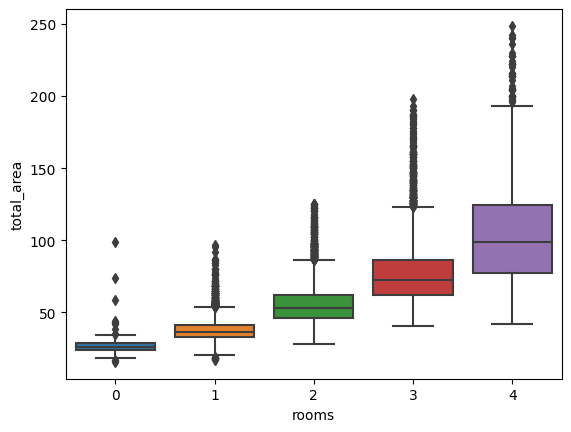

In [70]:
for_plot = data.query('rooms < 5')
ax = sns.boxplot(x = for_plot['rooms'], y = data['total_area'], data = data)
plt.show()

Проверим, адекватное ли количество аномалий мы удалили.

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23466 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23466 non-null  int64         
 1   last_price               23466 non-null  float64       
 2   total_area               23466 non-null  float64       
 3   first_day_exposition     23466 non-null  datetime64[ns]
 4   rooms                    23466 non-null  int64         
 5   ceiling_height           23466 non-null  float64       
 6   floors_total             23466 non-null  float64       
 7   living_area              23466 non-null  float64       
 8   floor                    23466 non-null  int64         
 9   is_apartment             23466 non-null  bool          
 10  studio                   23466 non-null  bool          
 11  open_plan                23466 non-null  bool          
 12  kitchen_area             21269 n

**Столбец kitchen_area**

Пропусков в нем пара тысяч, попробуем заменить их также с помощью коэффициента, для начала найдем средние коэффициенты по строкам, где значения имеются, затем округлим их до двух знаков после запятой и сгруппируем по количеству комнат в квартире.

In [72]:
data['kitchen_coefficient'] = data['kitchen_area'] / data['total_area']

round_coeff = round(data['kitchen_coefficient'].groupby(data['rooms']).mean(), 2)
round_coeff

rooms
0      NaN
1     0.25
2     0.17
3     0.14
4     0.12
5     0.11
6     0.10
7     0.09
8     0.09
9     0.08
10    0.09
11    0.07
12    0.12
14    0.08
15    0.17
16    0.05
19    0.07
Name: kitchen_coefficient, dtype: float64

Таким образом мы видим, что для каждого типа квартир коэффициент кухни немного различается, поэтому заменим Nan'ы в размерах кухни по коэффициенту в зависимости от количества комнат.

Соберем все строки с Nan в kitchen_area в одну табличку.

In [73]:
na_kitchen = data[data['kitchen_coefficient'].isna()]
na_kitchen

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient,kitchen_coefficient
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.040,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19,1,2.65,9.0,18.368,2,False,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
37,10,1990000.0,45.8,2017-10-28,2,2.50,5.0,25.648,1,False,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18,1,2.65,22.0,22.400,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,NaN,NaN
59,15,6300000.0,46.5,2017-03-06,1,2.65,13.0,26.040,13,False,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08,1,2.56,18.0,19.600,10,False,False,False,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0,0.483951,NaN
23663,12,6400000.0,88.0,2018-01-12,4,2.55,10.0,49.280,1,False,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0,NaN,NaN
23670,9,2450000.0,45.6,2018-02-08,1,2.80,9.0,25.536,2,False,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN
23679,0,2500000.0,35.0,2017-12-08,1,2.65,9.0,19.600,4,False,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN


Создадим цикл, в котором для определенного кол-ва комнат в строку будет вноситься подходящий ранее высчитанный коэффициент.

In [74]:
for i in na_kitchen['rooms']:
    na_kitchen.loc[(na_kitchen["rooms"] == i), "kitchen_coefficient"] = round_coeff[i]

Проверим на строке с индексом 30, что все сработало.

In [75]:
na_kitchen.loc[30]

total_images                                12
last_price                           2200000.0
total_area                                32.8
first_day_exposition       2018-02-19 00:00:00
rooms                                        1
ceiling_height                            2.65
floors_total                               9.0
living_area                             18.368
floor                                        2
is_apartment                             False
studio                                   False
open_plan                                False
kitchen_area                               NaN
balcony                                    NaN
locality_name                         Коммунар
airports_nearest                           NaN
cityCenters_nearest                        NaN
parks_around3000                           NaN
parks_nearest                              NaN
ponds_around3000                           NaN
ponds_nearest                              NaN
days_expositi

Осталось перенести новые значения заполненного столбца kitchen_coefficient из na_kitchen в data.

In [76]:
data['kitchen_coefficient'] = data['kitchen_coefficient'].fillna(value = na_kitchen['kitchen_coefficient'])

In [77]:
data['kitchen_coefficient'].head(35)

0     0.231481
1     0.272277
2     0.148214
3     0.140000
4     0.410000
5     0.299342
6     0.386059
7     0.263966
8     0.265682
9     0.106557
10    0.214646
11    0.136364
12    0.166667
13    0.121495
14    0.222222
15    0.194872
16    0.109756
17    0.305556
18    0.180645
19    0.099174
20    0.150000
21    0.180380
22    0.189655
23    0.190625
24    0.201646
25    0.197368
26    0.116667
27    0.131429
28    0.265909
29    0.110000
30    0.250000
31    0.197349
32    0.100000
33    0.089041
34    0.242424
Name: kitchen_coefficient, dtype: float64

Все получилось!

Заполним все пропуски в площади кухни, ради которых всё это и начинали.

In [78]:
data['kitchen_area'] = data['kitchen_area'].fillna(value = (data['total_area'] * data['kitchen_coefficient']))

In [79]:
data['kitchen_area'].isna().sum()

189

Получилось, пропуски заполнены.
Теперь проверим на аномалии:

In [80]:
data['kitchen_area'].describe()

count    23277.000000
mean        10.462831
std          5.557638
min          1.300000
25%          7.100000
50%          9.100000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

1,3 это даже не коридор.. удалим все строки с подозрительными размерами кухонь, если их немного.

In [81]:
data.query('kitchen_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient,kitchen_coefficient
76,12,2800000.0,55.1,2016-05-14,3,2.60,5.0,38.40,1,False,False,False,4.900,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.0,0.696915,0.088929
298,9,2650000.0,42.8,2017-04-25,2,2.65,5.0,30.00,3,False,False,False,4.500,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,49.0,0.700935,0.105140
422,8,1700000.0,55.2,2018-03-24,3,2.50,5.0,38.50,5,False,False,False,4.500,NaN,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.697464,0.081522
906,15,2600000.0,27.0,2017-07-10,1,2.75,23.0,18.00,18,False,False,False,2.000,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0,0.666667,0.074074
1327,6,2650000.0,46.2,2016-12-01,2,2.50,5.0,29.20,5,False,False,False,4.900,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,704.0,0.632035,0.106061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22839,14,3350000.0,27.0,2018-11-03,1,2.70,16.0,15.12,6,False,False,False,4.000,2.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,35.0,NaN,0.148148
22849,6,2380000.0,25.0,2016-03-22,1,2.65,25.0,19.00,15,False,False,False,4.000,1.0,посёлок Шушары,13461.0,19247.0,0.0,NaN,1.0,351.0,140.0,0.760000,0.160000
23110,1,2900000.0,34.0,2018-02-01,2,2.90,2.0,20.00,1,False,False,False,4.000,NaN,посёлок Стрельна,27006.0,23832.0,0.0,NaN,2.0,872.0,196.0,0.588235,0.117647
23191,3,1900000.0,18.9,2016-04-04,1,2.65,16.0,16.00,12,False,False,False,4.725,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0,0.846561,0.250000


Посмотрим на самые большие кухни, возможно это тоже выбросы.

In [82]:
data.query('kitchen_area > 70')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient,kitchen_coefficient
492,18,95000000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,False,False,False,77.0,NaN,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0,0.398148,0.356481
4394,20,57000000.0,174.0,2015-11-09,3,3.20,10.0,95.0,6,False,False,False,77.0,NaN,Санкт-Петербург,31706.0,4166.0,1.0,193.0,3.0,199.0,1039.0,0.545977,0.442529
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,0.693220,0.169492
10867,1,56844500.0,177.9,2015-01-15,3,2.65,6.0,87.2,5,True,False,False,87.2,NaN,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,NaN,0.490163,0.490163
14644,17,47000000.0,150.0,2017-02-28,4,3.70,6.0,58.0,5,False,False,False,75.0,1.0,Санкт-Петербург,16085.0,7616.0,0.0,NaN,0.0,NaN,507.0,0.386667,0.500000
16239,5,82400000.0,181.1,2017-05-24,3,3.90,9.0,58.2,4,False,False,False,93.2,NaN,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,501.0,0.321369,0.514633
16647,15,122000000.0,145.0,2017-04-25,3,3.30,6.0,36.0,2,False,False,False,72.0,NaN,Санкт-Петербург,33931.0,7023.0,2.0,478.0,3.0,250.0,335.0,0.248276,0.496552
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,0.455222,0.124444


Они хоть и большие, но находятся в огромных квартирах, так что оставим их как есть.

Удалим только невозможно маленькие кухни.

In [83]:
data = data.query('~(kitchen_area < 5)')

**Столбец balcony**

Мы помним, что там было много пропусков, сразу заполним их 0.

In [84]:
data['balcony'] = data['balcony'].fillna(value = 0)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23360 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23360 non-null  int64         
 1   last_price               23360 non-null  float64       
 2   total_area               23360 non-null  float64       
 3   first_day_exposition     23360 non-null  datetime64[ns]
 4   rooms                    23360 non-null  int64         
 5   ceiling_height           23360 non-null  float64       
 6   floors_total             23360 non-null  float64       
 7   living_area              23360 non-null  float64       
 8   floor                    23360 non-null  int64         
 9   is_apartment             23360 non-null  bool          
 10  studio                   23360 non-null  bool          
 11  open_plan                23360 non-null  bool          
 12  kitchen_area             23171 n

Посмотрим на гистограмму:

<AxesSubplot:>

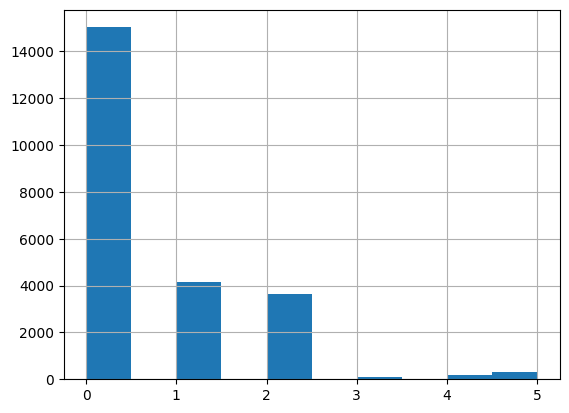

In [86]:
data.balcony.hist()

На всякий случай проверим строки с большим кол-вом балконов.

In [87]:
data.query('(balcony ==4)or(balcony ==5)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient,kitchen_coefficient
41,16,7900000.0,74.00,2016-05-04,3,2.65,14.0,59.000,8,False,False,False,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0,0.797297,0.162162
42,13,22000000.0,161.80,2015-07-08,4,2.80,4.0,80.900,2,False,False,False,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,0.500000,0.108776
116,18,10999000.0,97.20,2017-11-13,3,2.50,16.0,54.432,16,False,False,False,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0,NaN,0.188272
121,20,33000000.0,180.00,2017-02-17,3,2.90,9.0,86.000,8,False,False,False,24.0,4.0,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0,0.477778,0.133333
250,13,3200000.0,51.70,2019-01-22,2,2.65,16.0,29.200,5,False,False,False,7.7,4.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.564797,0.148936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,10,4300000.0,52.00,2019-04-21,1,2.70,16.0,28.000,8,False,False,False,11.0,5.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.538462,0.211538
23474,16,5900000.0,40.50,2019-03-16,2,2.73,17.0,31.000,16,False,False,False,5.0,4.0,Санкт-Петербург,19901.0,21613.0,0.0,NaN,1.0,1003.0,NaN,0.765432,0.123457
23497,17,6150000.0,55.40,2019-04-22,2,2.80,20.0,29.400,16,False,False,False,9.6,4.0,Санкт-Петербург,16285.0,13873.0,0.0,NaN,1.0,481.0,NaN,0.530686,0.173285
23526,14,5800000.0,60.69,2018-03-13,3,2.50,9.0,39.700,2,False,False,False,6.2,5.0,Санкт-Петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0,0.654144,0.102159


Очень странно, около 400 строк с таким огромным количеством балконов.

In [88]:
data.query('((balcony ==4)or(balcony ==5)) and total_area < 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient,kitchen_coefficient
250,13,3200000.0,51.7,2019-01-22,2,2.65,16.0,29.200,5,False,False,False,7.70,4.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.564797,0.148936
654,6,2750000.0,36.0,2017-04-18,1,2.65,5.0,20.500,5,False,False,False,7.80,4.0,Кронштадт,69785.0,51511.0,2.0,52.0,3.0,313.0,381.0,0.569444,0.216667
1030,11,7985250.0,57.5,2018-08-21,2,2.65,25.0,32.200,2,False,False,False,11.24,5.0,Санкт-Петербург,7019.0,13235.0,1.0,712.0,0.0,NaN,60.0,NaN,0.195478
1788,6,6276110.0,52.2,2019-04-29,1,3.00,4.0,29.232,3,False,False,False,11.49,5.0,Санкт-Петербург,45850.0,21782.0,0.0,NaN,1.0,740.0,NaN,NaN,0.220115
2064,0,4250000.0,56.0,2018-05-24,3,2.65,9.0,40.000,3,False,False,False,7.00,5.0,Колпино,24964.0,30750.0,1.0,343.0,0.0,NaN,286.0,0.714286,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,1,4300000.0,58.0,2018-09-04,3,2.65,9.0,40.000,3,False,False,False,7.00,5.0,Колпино,25203.0,30990.0,0.0,NaN,1.0,451.0,190.0,0.689655,0.120690
23147,8,5780000.0,55.0,2017-11-23,2,2.55,10.0,28.600,8,False,False,False,8.00,5.0,Санкт-Петербург,42447.0,11146.0,1.0,451.0,0.0,NaN,41.0,0.520000,0.145455
23363,10,4300000.0,52.0,2019-04-21,1,2.70,16.0,28.000,8,False,False,False,11.00,5.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.538462,0.211538
23474,16,5900000.0,40.5,2019-03-16,2,2.73,17.0,31.000,16,False,False,False,5.00,4.0,Санкт-Петербург,19901.0,21613.0,0.0,NaN,1.0,1003.0,NaN,0.765432,0.123457


Более 100 строк с невероятным значением балконов для такой скромной площади.

Можно было бы заполнить данные строки медианным значением.

In [89]:
print('Медиана:', data[data['total_area'] < 60]['balcony'].median())
print('Среднее:', data[data['total_area'] < 60]['balcony'].mean())

Медиана: 0.0
Среднее: 0.5610291595197255


Но поскольку медиана 0, а среднее 0,56, боюсь, что 0 или 1 в столбце balcony могут исказить в будущем результаты для маленьких квартир, (ведь нулем у нас уже и так отмечены строки, где забыли указать значения и было Nan), поэтому просто удалим целиком все эти строки, чтобы не исказить данные.

In [90]:
data = data.query('~(((balcony ==4)or(balcony ==5)) and total_area < 60)')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23230 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23230 non-null  int64         
 1   last_price               23230 non-null  float64       
 2   total_area               23230 non-null  float64       
 3   first_day_exposition     23230 non-null  datetime64[ns]
 4   rooms                    23230 non-null  int64         
 5   ceiling_height           23230 non-null  float64       
 6   floors_total             23230 non-null  float64       
 7   living_area              23230 non-null  float64       
 8   floor                    23230 non-null  int64         
 9   is_apartment             23230 non-null  bool          
 10  studio                   23230 non-null  bool          
 11  open_plan                23230 non-null  bool          
 12  kitchen_area             23041 n

Удаление прошло корректно.

**Столбец locality_name**

Изучим уникальные значения столбца:

In [92]:
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Невероятное разнообразие...

In [93]:
data.locality_name.isna().sum()

47

Хорошо хоть пропусков немного, удалим их.

In [94]:
data.dropna(subset = ['locality_name'], axis = 'index', how = 'all', inplace = True)

Создадим функцию, позволяющую оценить неявные дубликаты.

In [95]:
def possible_similarity(arr):
    similarity = {}
    for name in arr:
        for word in name.split():
            if word.lower() not in ['поселок',
                                     'посёлок',
                                     'деревня',
                                     'городского',
                                     'типа',
                                     'садовое',
                                     'товарищество',
                                     'станции',
                                     'при',
                                     'железнодорожной',
                                     'малое']\
                                        and word not in similarity:
                for element in arr:
                    if word in element:
                        if word in similarity:
                            similarity[word].append(element)
                        else:
                            similarity[word] = [element]
 
    return similarity

In [96]:
res = possible_similarity(set(data['locality_name'].unique()) - set([np.nan]))
res

{'Рабитицы': ['поселок Рабитицы', 'деревня Рабитицы'],
 'Хапо-Ое': ['деревня Хапо-Ое'],
 'городской': ['городской посёлок Будогощь',
  'городской поселок Янино-1',
  'городской посёлок Свирьстрой',
  'городской посёлок Янино-1',
  'городской посёлок Фёдоровское',
  'городской посёлок Советский',
  'городской посёлок Новоселье',
  'городской посёлок Лесогорский',
  'городской посёлок Рощино',
  'городской посёлок Павлово',
  'городской посёлок Виллози',
  'городской посёлок Мга',
  'городской поселок Большая Ижора',
  'городской посёлок Назия'],
 'Будогощь': ['городской посёлок Будогощь'],
 'Янино-1': ['городской поселок Янино-1', 'городской посёлок Янино-1'],
 'Серебрянский': ['поселок Серебрянский'],
 'Заклинье': ['деревня Заклинье'],
 'Колтуши': ['деревня Колтуши'],
 'Лесколово': ['деревня Лесколово'],
 'Зимитицы': ['деревня Зимитицы', 'поселок Зимитицы'],
 'Дружноселье': ['поселок Дружноселье'],
 'имени': ['посёлок городского типа имени Свердлова',
  'посёлок городского типа имени М

Ну, не то чтобы это сильно нам помогло...

Т.к. дубликатов очень много, попробуем вынести название типа населенного пункта в отдельный столбец

In [97]:
def categorize_locality_name(locality_name):
    if 'городской поселок' in locality_name:
        return 'пгт'
    elif 'поселок городского типа' in locality_name:
        return 'пгт'
    elif 'поселок' in locality_name:
        return 'поселок'
    elif 'деревня' in locality_name:
        return 'деревня'
    elif 'село' in locality_name:
        return 'село'
    elif 'коттеджный поселок'in locality_name:
        return 'коттеджный поселок'
    elif 'садовое' in locality_name:
        return 'садовое товарищество'
    elif 'садоводческое' in locality_name:
        return 'садовое товарищество'
    else:
        return 'город'

In [98]:
data['locality_type'] = data['locality_name'].apply(categorize_locality_name)

In [99]:
data['locality_type'].head(25)

0       город
1       город
2       город
3       город
4       город
5       город
6       город
7       город
8       город
9       город
10      город
11      город
12      город
13      город
14      город
15      город
16      город
17      город
18      город
19      город
20      город
21      город
22    деревня
23      город
24      город
Name: locality_type, dtype: object

Заработало!

А названия населенных пунктов наоборот уберем из первоначального столбца.

In [100]:
data['locality_name']= data['locality_name'].str.replace('ё', 'е', regex = True)
data['locality_name'].replace(['поселок городского типа ', 'городской поселок ',\
                               'поселок ', 'деревня ', 'село ', 'садовое товарищество', \
                               'садоводческое некоммерческое товарищество ', 'при железнодорожной станции ',\
                               'станции ', 'коттеджный '], '', regex = True, inplace = True)

In [101]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', ' Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа', 'Нурма',
       'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск', 'Алексан

Проверим. Всё получилось.

**Столбец airports_nearest**

Проверим, что там с пропущенными.

In [102]:
data['airports_nearest'].isna().sum()

5421

Более 5тыс. человек поленились заполнить расстояние до ближайщего аэропорта

In [103]:
data[data['airports_nearest'].isna()]['locality_name'].unique()

array(['Янино-1', 'Мурино', 'Сертолово', 'Кудрово', 'Коммунар',
       'Красный Бор', 'Гатчина', 'Федоровское', 'Выборг', 'Кировск',
       'Новое Девяткино', 'Санкт-Петербург', 'Лебяжье', 'Сиверский',
       'Молодцово', 'Кузьмоловский', ' Новая Ропша', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Куттузи',
       'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье', 'Торковичи',
       'Первомайское', 'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Тихвин', 'Победа', 'Нурма', 'Синявино',
       'Шушары', 'Тосно', 'Бокситогорск', 'Лопухинка', 'Пикалево',
       'Терволово', 'Советский', 'Кириши', 'Подпорожье', 'Петровское',
       'Токсово', 'Сельцо', 'Вырица', 'Кипень', 'Келози', 'Вартемяги',
       'Тельмана', 'Севастьяново', 'Большая Иж

Еще и в очень разных городах пропуски... заполнить их адекватно и быстро не представляется возможным на данном этапе, если они нам дальше не понадобятся, то оставим всё как есть.

**Столбец cityCenters_nearest**

Проверим, что здесь с пропусками:

In [104]:
data.cityCenters_nearest.isna().sum()

5399

Опять около 5тыс пропусков.

**Столбец parks_around3000**

In [105]:
data.parks_around3000.isna().sum()

5398

Почти одинакое количество...

Может быть все значения не заполнены в одних и тех же строках?

In [106]:
data.query('(cityCenters_nearest.isna()) & (parks_around3000.isna()) &\
(parks_nearest.isna()) & (ponds_around3000.isna() & (ponds_nearest.isna()))')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient,kitchen_coefficient,locality_type
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400,5,False,False,False,9.100,0.0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.473684,0.299342,город
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430,26,False,False,False,8.810,0.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.465320,0.265682,город
12,10,3890000.0,54.00,2016-06-30,2,2.65,5.0,30.000,5,False,False,False,9.000,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.555556,0.166667,город
22,20,5000000.0,58.00,2017-04-24,2,2.75,25.0,30.000,15,False,False,False,11.000,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,0.517241,0.189655,деревня
30,12,2200000.0,32.80,2018-02-19,1,2.65,9.0,18.368,2,False,False,False,8.200,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,0.250000,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5.0,45.500,3,False,False,False,5.500,0.0,Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.724522,0.087580,город
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.500,4,False,False,False,6.000,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,0.583333,0.200000,город
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000,4,False,False,False,8.500,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.644068,0.144068,город
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700,1,False,False,False,9.639,0.0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.523810,0.170000,село


Да, гипотеза подтвердилась, не отмечены все сразу.

Проверим, может быть раньше не было таких граф в объявлении и поэтому люди их не заполняли?

In [107]:
test = data.query('(cityCenters_nearest.isna()) & (parks_around3000.isna()) &\
(parks_nearest.isna()) & (ponds_around3000.isna() & (ponds_nearest.isna()))')
test.first_day_exposition.max()

Timestamp('2019-05-03 00:00:00')

Нет, здесь самая максимальная дата из возможных в датасете..

Проверим еще одну гипотезу:

In [108]:
test.locality_name.unique()

array(['Янино-1', 'Мурино', 'Сертолово', 'Кудрово', 'Коммунар',
       'Красный Бор', 'Гатчина', 'Федоровское', 'Выборг', 'Кировск',
       'Новое Девяткино', 'Санкт-Петербург', 'Лебяжье', 'Сиверский',
       'Молодцово', 'Кузьмоловский', ' Новая Ропша', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Куттузи',
       'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье', 'Торковичи',
       'Первомайское', 'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Тихвин', 'Победа', 'Нурма', 'Синявино',
       'Шушары', 'Тосно', 'Бокситогорск', 'Лопухинка', 'Пикалево',
       'Терволово', 'Советский', 'Кириши', 'Подпорожье', 'Петровское',
       'Токсово', 'Сельцо', 'Вырица', 'Кипень', 'Келози', 'Вартемяги',
       'Тельмана', 'Севастьяново', 'Большая Иж

Ага! в выборке нет Санкт-Петербурга! Наверное отметить парки и аэропорты можно только для питерских квартир.

**Столбец parks_nearest** 

In [109]:
data.parks_nearest.isna().sum()

15281

Пока оставляем пропуски как есть.

**Столбец ponds_around3000**

In [110]:
data.ponds_around3000.isna().sum()

5398

Пока оставляем пропуски как есть.

**Столбец ponds_nearest**

In [111]:
data.ponds_nearest.isna().sum()

14300

Пока оставляем пропуски как есть.

**Столбец days_exposition**

Много пропущенных и в days_exposition.

In [112]:
data.days_exposition.isna().sum()

3114

Посмотрим, что с этими строками не так.

In [113]:
data.query('days_exposition.isna()').first_day_exposition.value_counts(50)

2019-04-22    0.014130
2019-04-18    0.013809
2019-04-08    0.011561
2019-04-04    0.011561
2019-04-26    0.011240
                ...   
2017-12-15    0.000321
2017-01-11    0.000321
2018-01-08    0.000321
2017-09-15    0.000321
2017-08-27    0.000321
Name: first_day_exposition, Length: 702, dtype: float64

Видим, что скорее всего эти объявления не были закрыты на момент формирования выборки (2019 год).

<AxesSubplot:>

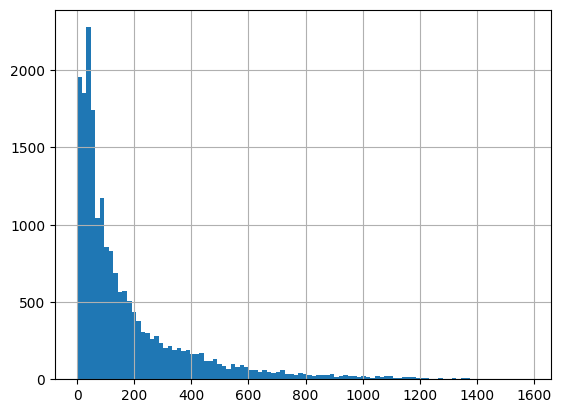

In [114]:
data.days_exposition.hist(bins = 100)

В целом все выглядит ровненько и логично.

Проверим, что с выбросами:

<AxesSubplot:>

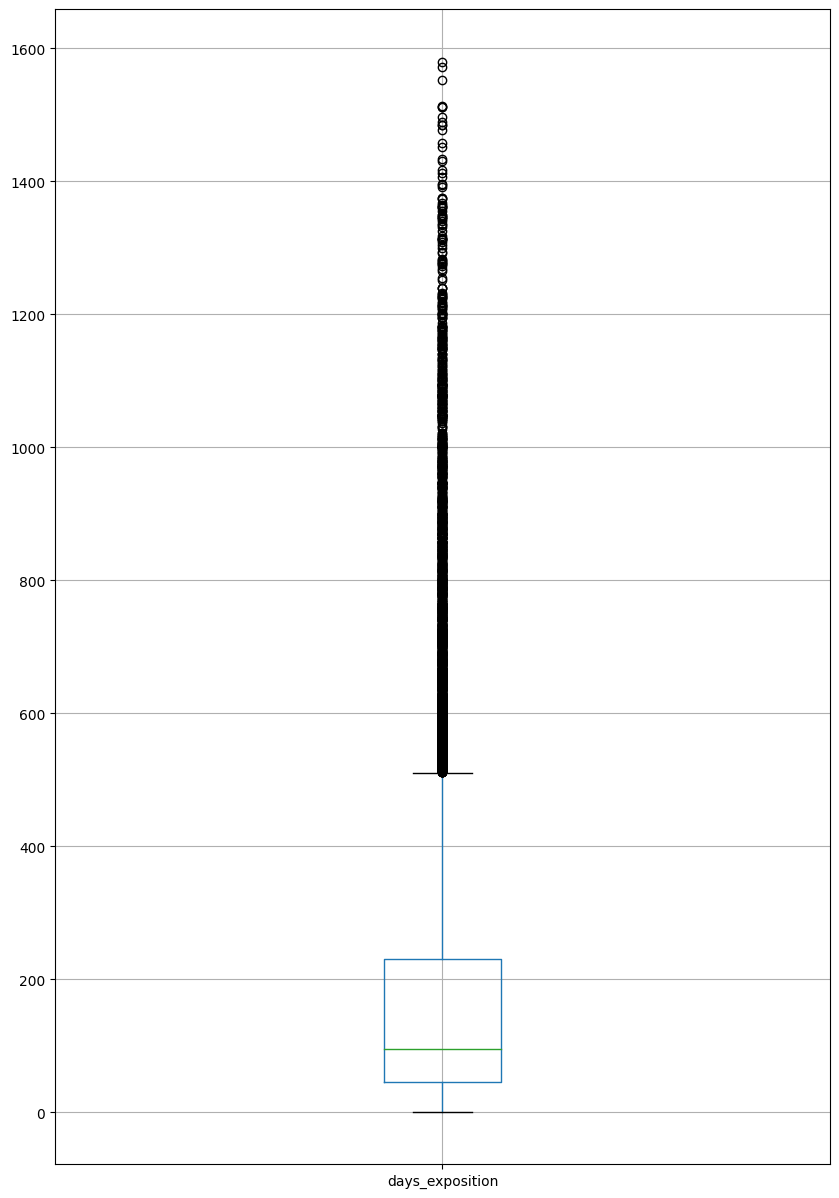

In [115]:
data.boxplot(column = 'days_exposition', figsize = (10, 15))

Выбросов очень много, но они не уникальны, удалять их не будем, вряд ли они помешают нам в анализе.

In [116]:
data[data['days_exposition'].isna()].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coefficient,kitchen_coefficient
count,3114.000000,3.114000e+03,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3100.000000,3114.000000,2269.000000,2270.000000,2271.000000,1124.000000,2271.000000,1190.000000,0.0,2923.000000,3100.000000
mean,11.451830,8.066887e+06,69.473015,2.369942,2.734380,9.495504,40.501779,5.258189,11.376830,0.565832,28506.559718,13543.314537,0.685601,489.535587,0.830031,505.852101,NaN,0.577630,0.176069
std,5.568926,8.873875e+06,41.865115,1.181263,0.267726,6.105888,26.147760,4.418241,6.839023,0.976927,12068.629515,8919.006277,0.826201,324.151015,0.975107,279.968501,NaN,0.103414,0.072082
min,0.000000,4.300000e+05,20.600000,0.000000,2.400000,1.000000,10.000000,1.000000,5.000000,0.000000,6989.000000,181.000000,0.000000,13.000000,0.000000,13.000000,NaN,0.196382,0.030894
25%,7.000000,3.800000e+06,44.000000,2.000000,2.550000,5.000000,24.713000,2.000000,7.351750,0.000000,19010.000000,7439.250000,0.000000,300.750000,0.000000,267.000000,NaN,0.514095,0.123801
50%,11.000000,5.600000e+06,60.000000,2.000000,2.650000,8.000000,35.000000,4.000000,9.500000,0.000000,26402.000000,12481.000000,0.000000,462.000000,1.000000,485.000000,NaN,0.584906,0.157895
75%,16.000000,9.000000e+06,80.000000,3.000000,2.800000,12.000000,48.000000,7.000000,12.862500,1.000000,36553.000000,15927.000000,1.000000,603.250000,1.000000,722.500000,NaN,0.649626,0.214286
max,20.000000,1.400000e+08,631.200000,11.000000,4.500000,36.000000,353.360000,30.000000,87.200000,5.000000,84853.000000,65952.000000,3.000000,2880.000000,3.000000,1271.000000,NaN,0.945427,0.583333


По медиане видим, что медианные квартиры по цене около 6млн при площади около 60кв м. Цена не завышена, поэтому долгая продажа остается загадкой.

In [117]:
data[data['days_exposition'].isna()]['locality_name'].unique()

array(['Санкт-Петербург', 'Кировск', 'Лебяжье', ' Новая Ропша', 'Волхов',
       'Пушкин', 'Приозерск', 'Аннино', 'Сестрорецк', 'Первомайское',
       'Старая', 'Всеволожск', 'Лесколово', 'Ивангород', 'Мурино',
       'Парголово', 'Красное Село', 'Кудрово', 'Колпино', 'Петергоф',
       'Молодежное', 'Победа', 'Новый Свет', 'Сертолово', 'Кузьмоловский',
       'Бокситогорск', 'Подпорожье', 'Гатчина', 'Бугры', 'Петровское',
       'Сиверский', 'Кронштадт', 'Кипень', 'Зеленогорск', 'Шушары',
       'Кингисепп', 'Лесогорский', 'Лаголово', 'Цвелодубово', 'Рахья',
       'Выборг', 'Белогорка', 'Заводской', 'Батово', 'Федоровское',
       'Новая Ладога', 'Никольское', 'Отрадное', 'Сланцы', 'Поляны',
       'Янино-1', 'Стрельна', 'Елизаветино', 'Кузнечное', 'Синявино',
       'Кириши', 'Запорожское', 'Гостилицы', 'Мичуринское',
       'имени Морозова', 'Сосново', 'Чудской Бор', 'Малое Карлино',
       'Мины', 'Коркино', 'Новое Девяткино', 'Пикалево', 'Рабитицы',
       'Большие Колпаны', 'Ток

От населенного пункта пропуски не зависят. Оставим пока пропуски как есть.

Проверим, сколько данных у нас ушло при предобработке:

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23183 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23183 non-null  int64         
 1   last_price               23183 non-null  float64       
 2   total_area               23183 non-null  float64       
 3   first_day_exposition     23183 non-null  datetime64[ns]
 4   rooms                    23183 non-null  int64         
 5   ceiling_height           23183 non-null  float64       
 6   floors_total             23183 non-null  float64       
 7   living_area              23183 non-null  float64       
 8   floor                    23183 non-null  int64         
 9   is_apartment             23183 non-null  bool          
 10  studio                   23183 non-null  bool          
 11  open_plan                23183 non-null  bool          
 12  kitchen_area             22994 n

Итоги предобработки сведем в таблицу:

|Column|Non-Null|Dtype|Решили проблемы|
|:--------------------------|:------------|:---------|:------------------------------------------------|
|**total_images**| 23699|  int64| единственный столбец без проблем|
|**last_price**| 23699|  float64| убрали аномалии|
|**total_area**| 23699|  float64| убрали аномалии|
|**first_day_exposition**| 23699|  object| сменили тип на дату|
|**rooms**| 23699|  int64| 0 комнат с маленькой площадью отметили студиями, 0 заменили на 1|
|**ceiling_height** |14504|  float64| удалили аномальные значения и заполнили пропуски медианой|
|**floors_total** |23613|  float64| убрали несколько аномалий, удалили пропуски|
|**living_area** |21796|  float64| восстановили пропуски, применив коэффициент к общей площади| 
|**floor** |23699|  int64| проверили значения, всё корректно| 
|**is_apartment** |2775|  object| Nan заменили на False, т.к. скорее их просто не отмечали| 
|**studio** |23699|  bool| отметили 0 комнат и небольшую площадь студиями, сменили большим студиям статус на open_plan| 
|**open_plan** |23699|  bool| многие открытые планировки и студии пересекаются(если они небольшие), отобразили это в таблице| 
|**kitchen_area** |21421| float64| восстановили пропуски по коэффициенту (отношение кухни к общей площади для каждого типа квартир (1, 2, 3 комнатные)|
|**balcony** |12180| float64| отметили пропущенные как 0 (без балконов)|
|**locality_name** |23650|  object|схлопнули дубликаты, создали новый столбец с типом нас.пункта, удалили недостающие| 
|**airports_nearest** |18157| float64| проанализировали столбец, приняли решение оставить пропуски|
|**cityCenters_nearest** |18180| float64|ппроанализировали столбец, приняли решение оставить пропуски|
|**parks_around3000** |18181| float64|проанализировали столбец, приняли решение оставить пропуски|
|**parks_nearest** |8079| float64|проанализировали столбец, приняли решение оставить пропуски |
|**ponds_around3000** |18181|  float64|проанализировали столбец, приняли решение оставить пропуски |
|**ponds_nearest** |9110|  float64|проанализировали столбец, приняли решение оставить пропуски |
|**days_exposition** |20518| float64| скорее всего данные объявления не были закрыты на момент сбора датасета, приняли решение оставить пропуски|


Таким образом по итогу предобработки мы "почистили" данные, теперь с ними можно корректно работать.
От общего объема мы лишились всего 0,02% данных, это не критично.

### Посчитайте и добавьте в таблицу новые столбцы

**Добавление столбца square_meter_price**

In [119]:
data['square_meter_price'] = round((data['last_price'] / data['total_area']), 2)
data['square_meter_price']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: square_meter_price, Length: 23183, dtype: float64

**Добавление столбца weekday_of_exposition**

In [120]:
data['weekday_of_exposition'] = data['first_day_exposition'].dt.dayofweek

In [121]:
data['weekday_of_exposition']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday_of_exposition, Length: 23183, dtype: int64

**Добавление столбца month_of_exposition**

In [122]:
data['month_of_exposition'] = data['first_day_exposition'].dt.month
data['month_of_exposition']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_of_exposition, Length: 23183, dtype: int64

**Добавление столбца year_of_exposition**

In [123]:
data['year_of_exposition'] = data['first_day_exposition'].dt.year
data['year_of_exposition']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_of_exposition, Length: 23183, dtype: int64

**Добавление столбца type_of_floor**

In [124]:
def categorize_floor(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['type_of_floor'] = data.apply(lambda x: categorize_floor(x['floor'], x['floors_total']), axis = 1)

In [125]:
data.type_of_floor.value_counts()

другой       17075
последний     3251
первый        2857
Name: type_of_floor, dtype: int64

**Добавление столбца cityCenters_km**

In [126]:
data['cityCenters_km'] = round((data['cityCenters_nearest']/1000))
data['cityCenters_km'].head(20)

0     16.0
1     19.0
2     14.0
3      7.0
4      8.0
5      NaN
6     19.0
7     12.0
8      NaN
9     15.0
10    14.0
11    52.0
12     NaN
13    33.0
14    31.0
15    14.0
16    11.0
17    15.0
18    11.0
19    13.0
Name: cityCenters_km, dtype: float64

Итак, мы добавили в таблицу новые столбцы с важными признаками, которые пригодятся при дальнейшем анализе.

### Проведите исследовательский анализ данных

**Задание 1**

Изучение параметров

Изучим общую площадь:

<AxesSubplot:>

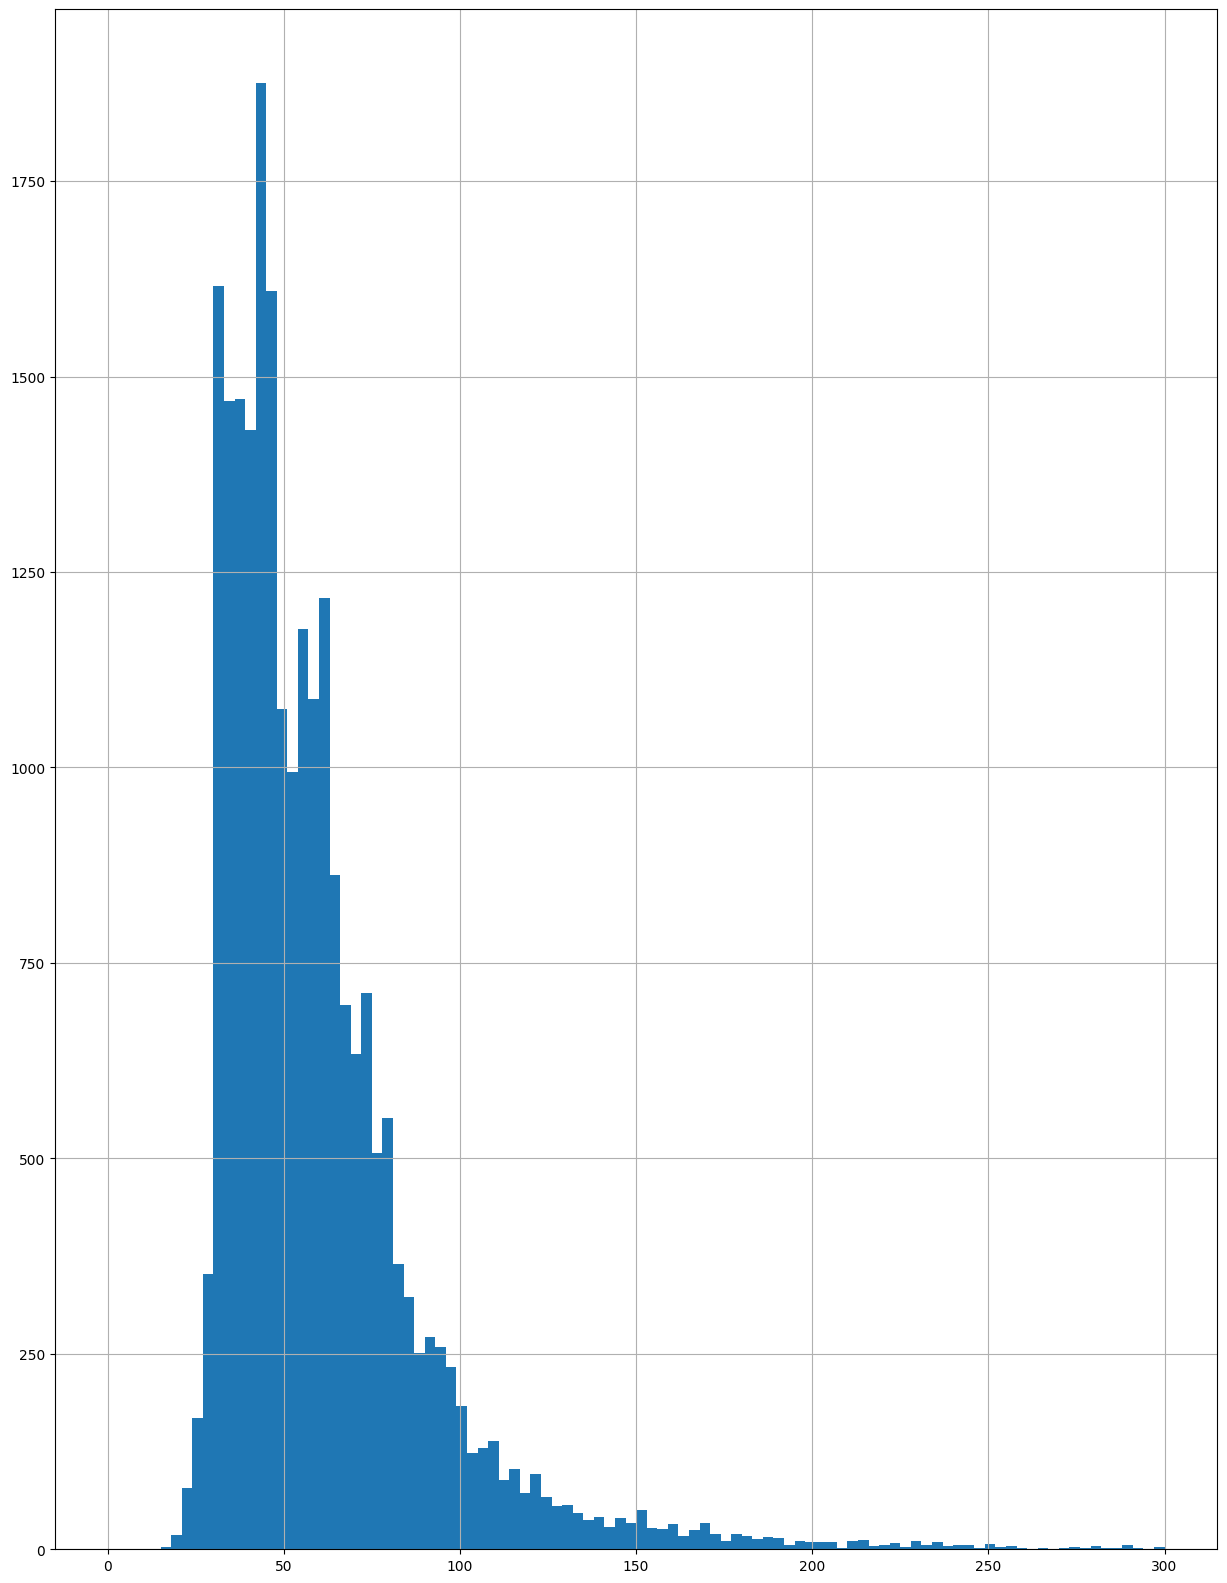

In [127]:
data.total_area.hist(bins = 100, range = (0, 300), figsize = (15, 20))

Итак, построив график мы видим, что наиболее популярная площадь квартиры в нашей выборке квартир на продажу - около 45 кв.м. После этого значения наблюдается спад с единичным всплеском (около 60 кв.м.). Скорее всего это обусловлено большим количеством типовых квартир советской постройки, где 45 квадратных метров - это типичная двушка, а 60 - трешка. Сюда же, вероятно, накладываются и современные квартиры, в которых площадь уже больше. Таким образом современные однушки в 45 квадратов сливаются с двушками советских времен, это и обуславливает пик на графике. График похож на распределение Пуассона.

Изучим жилую площадь:

<AxesSubplot:>

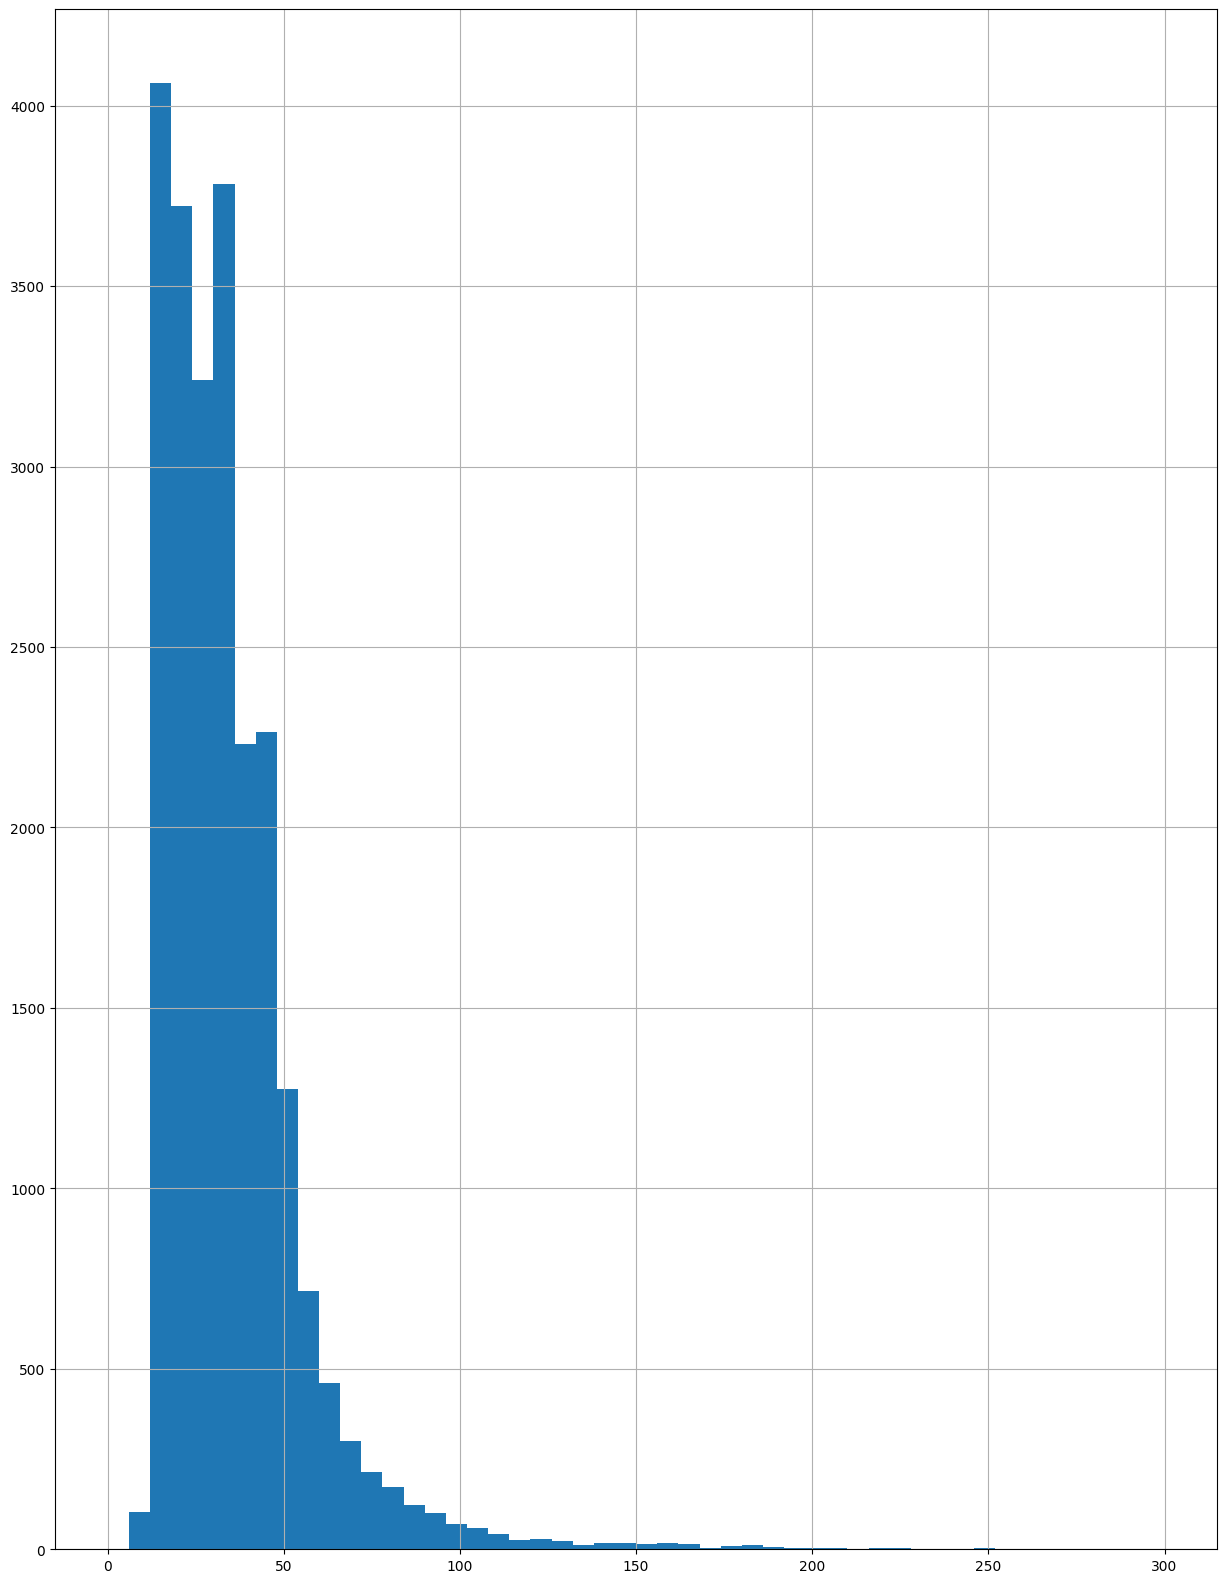

In [128]:
data['living_area'].hist(bins = 50, range = (0, 300), figsize = (15, 20))

Пики на графике не совпадают с аналогичными пиками на предыдущих, вероятно это связано с увеличением кухни в квартирах с большей площадью, а значит уменьшением жилой площади. Тогда как в самых популярных 45-метровых квартирах кухня минимальна, а значит жилая площадь больше.

Изучим площадь кухни:

<AxesSubplot:>

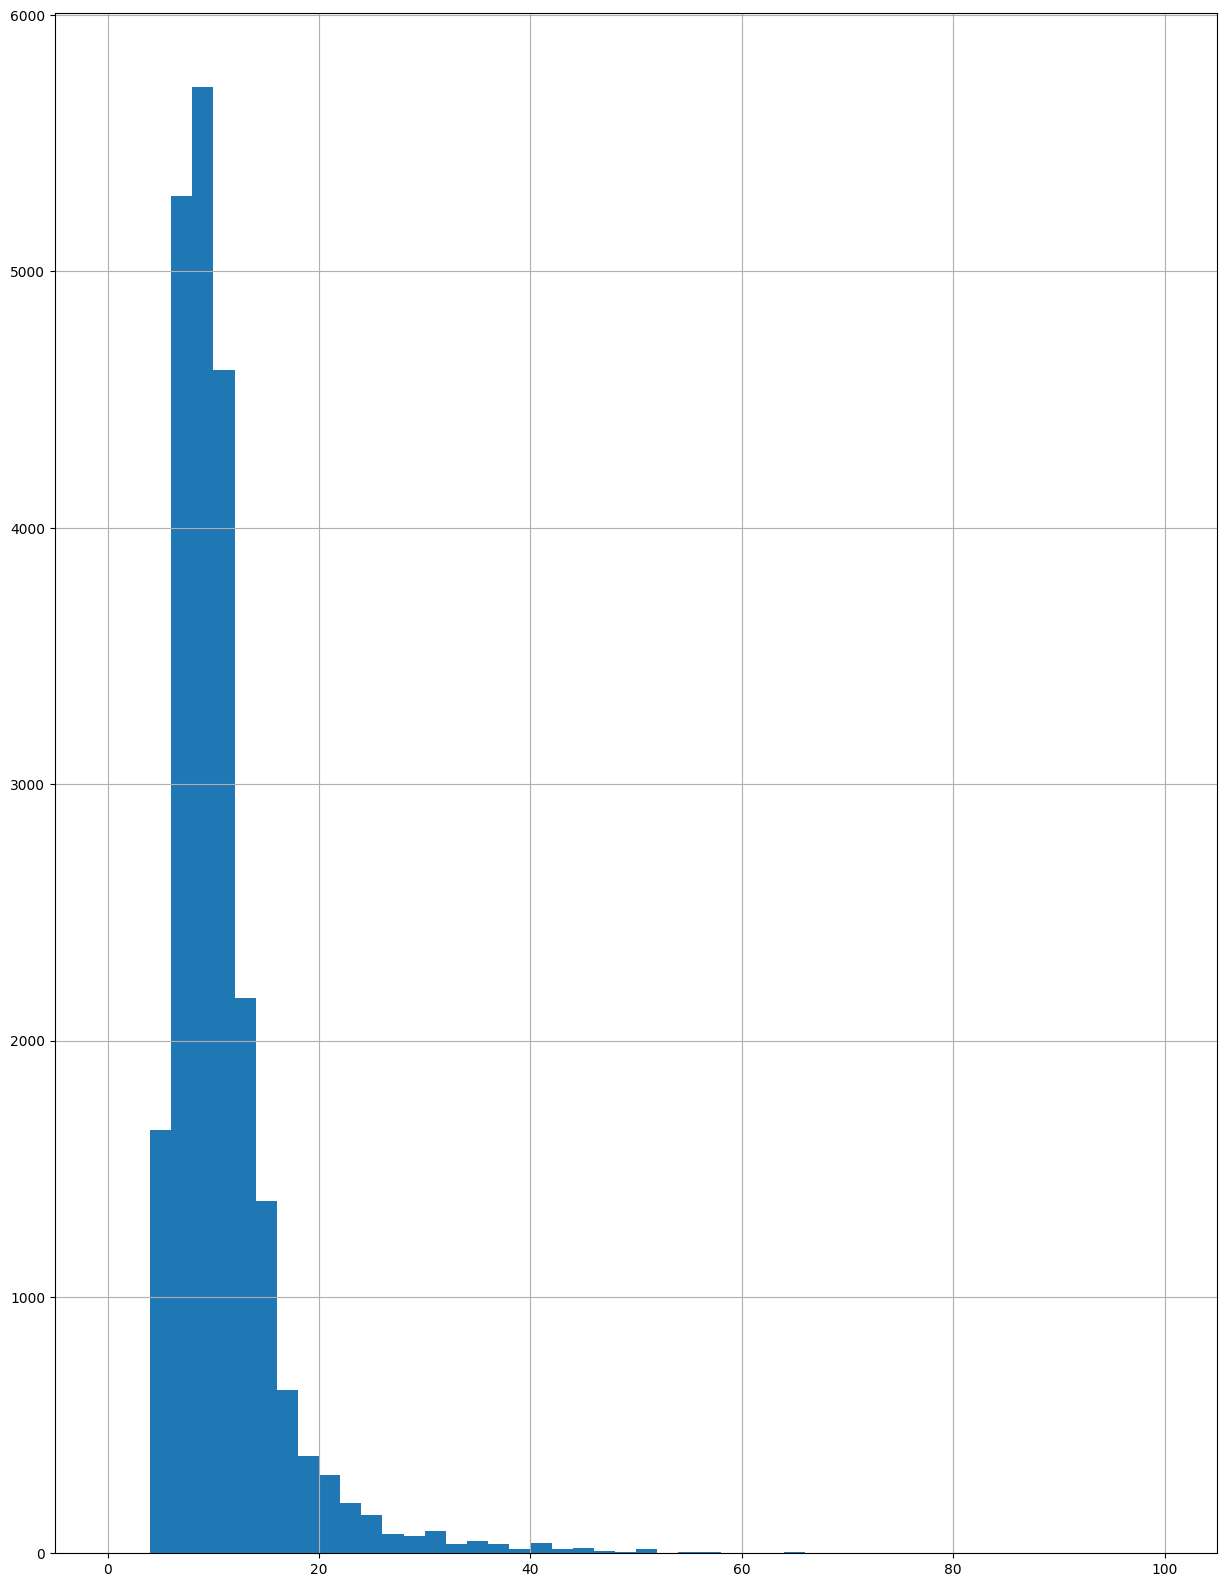

In [129]:
data.kitchen_area.hist(bins = 50, range = (0, 100), figsize = (15, 20))

Кухня около 7-12 квадратов это классика! Маленькие кухни также присутствуют вначале графика (крайне маленькие были исключены в ходе предобработки). После 10 кв.м. график идет на спад, хотя в сравнении с графиком общей площади можно было бы увеличить размеры кухни. Можно сделать вывод, что на кухнях стараются сэкономить пространство в пользу других жилых помещений.

Изучим цены:

<AxesSubplot:>

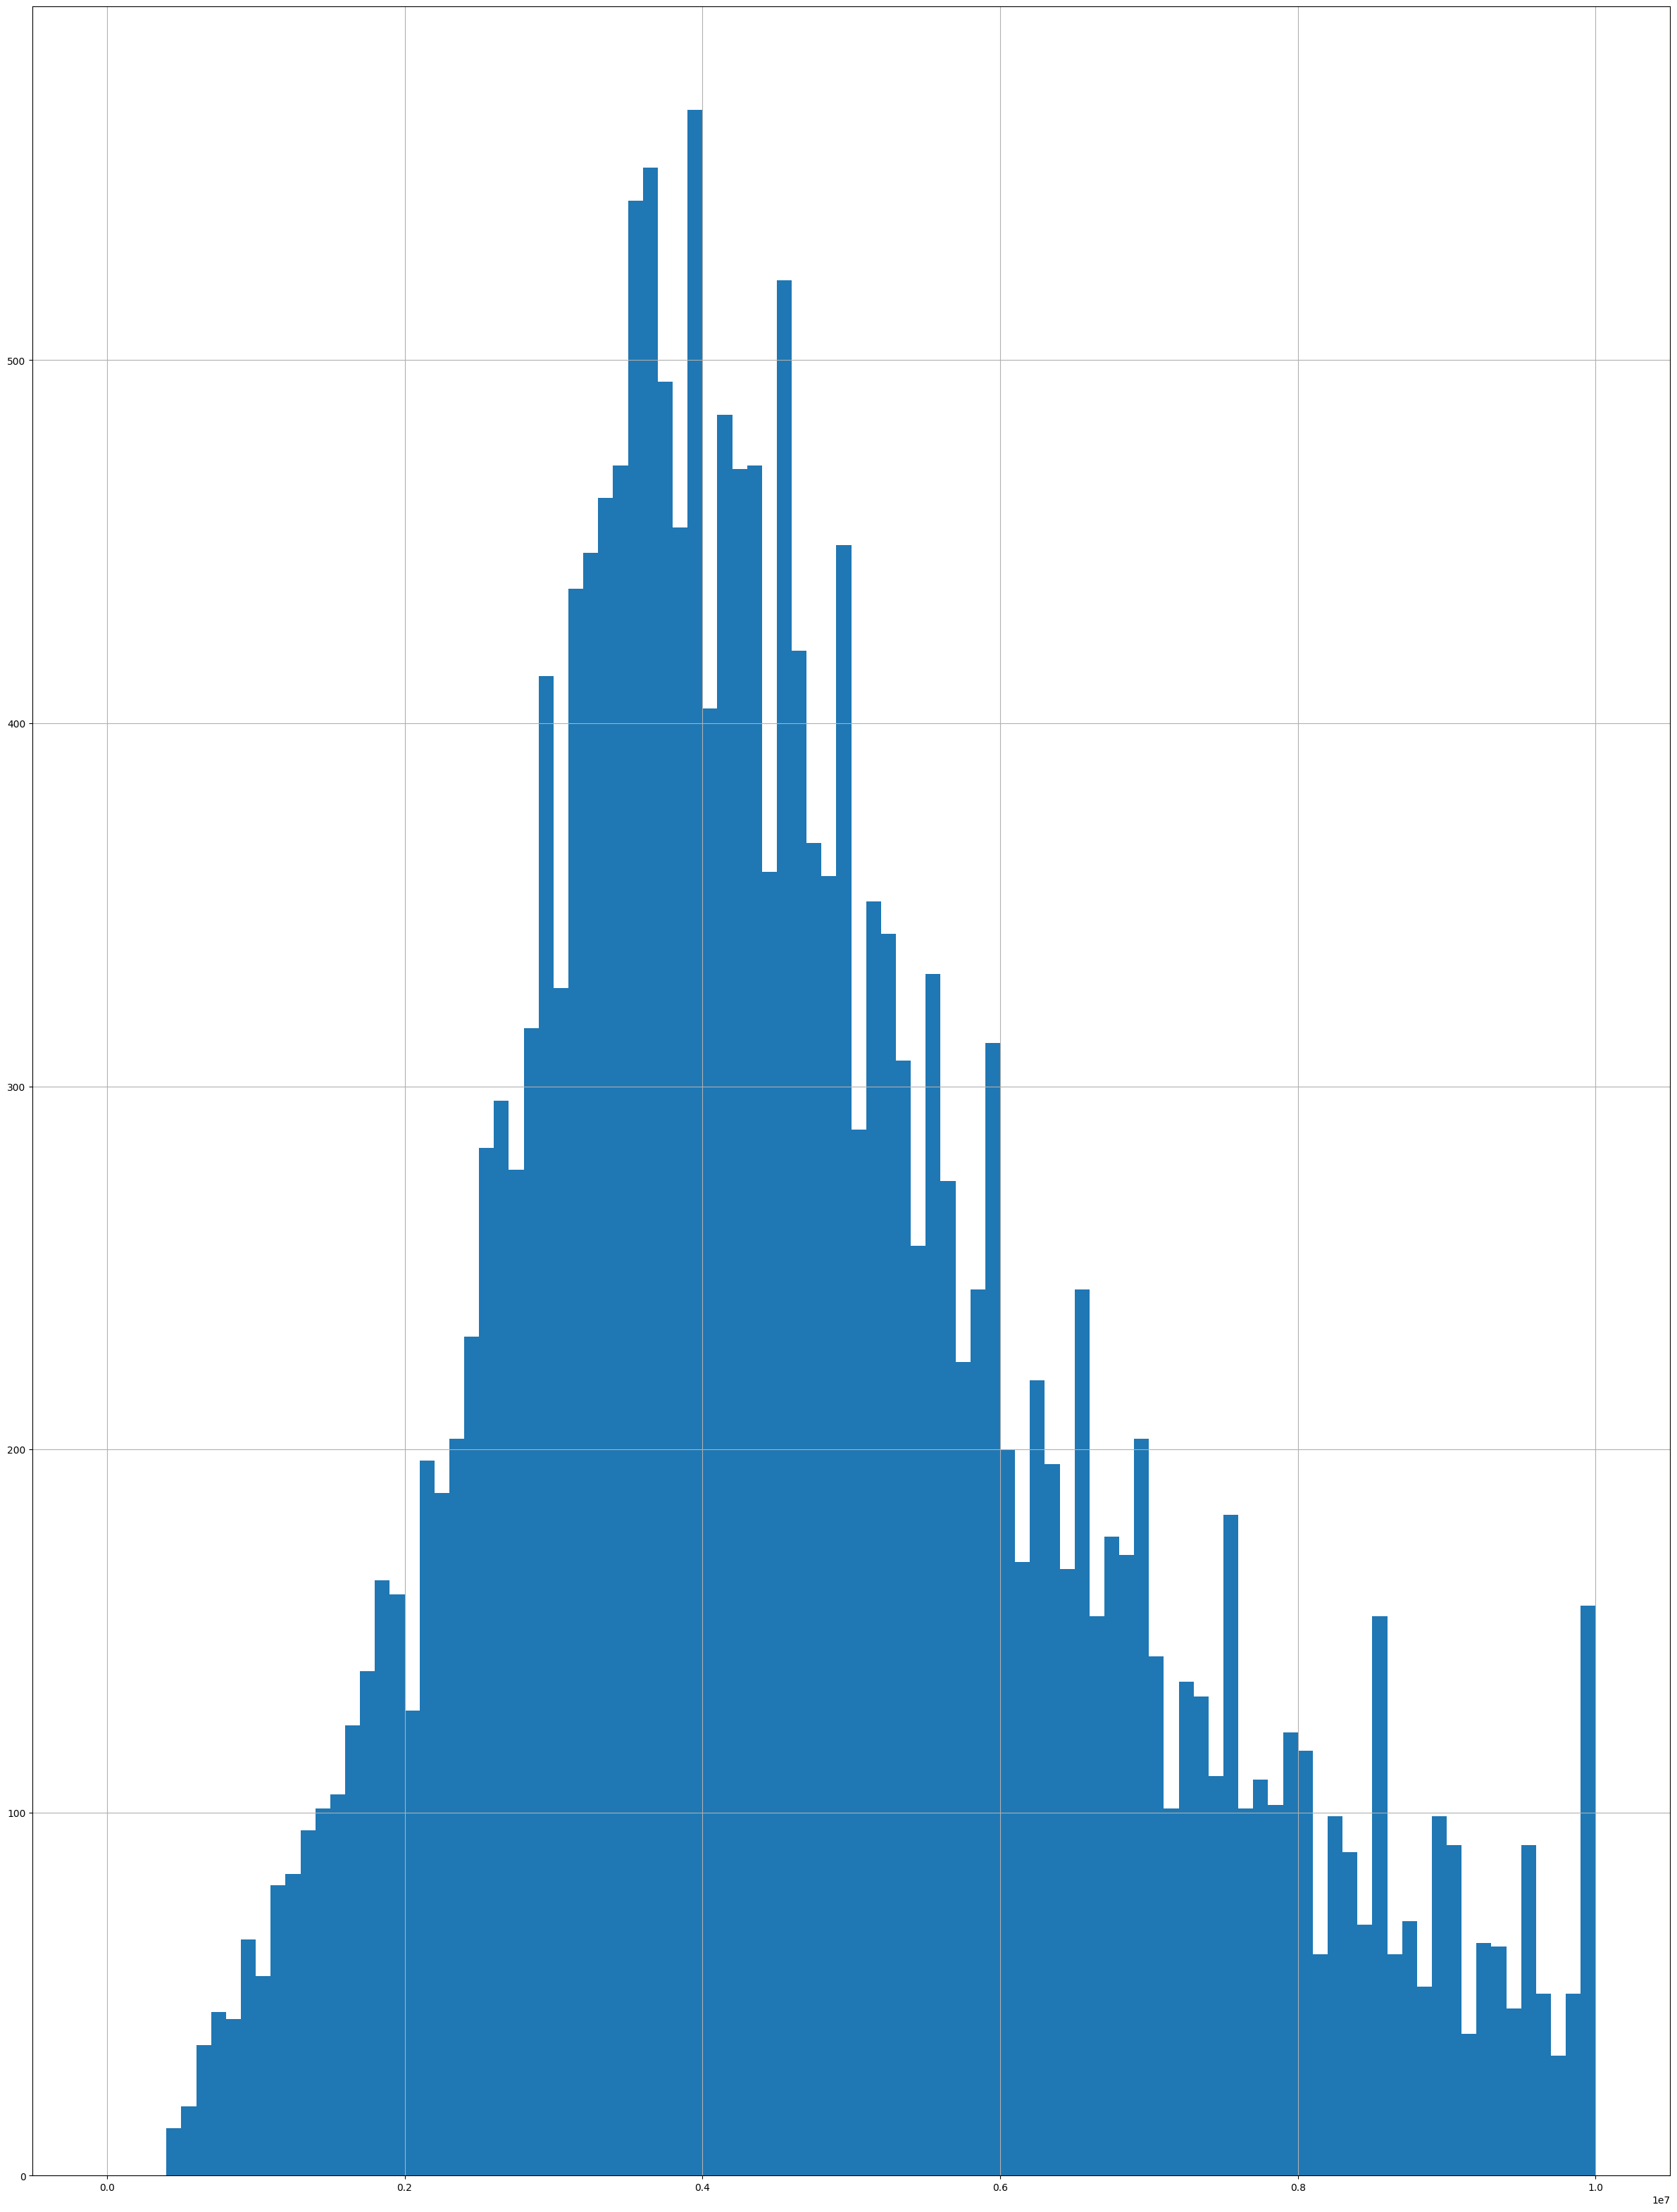

In [130]:
data['last_price'].hist(bins = (100), range = (0, 10000000), figsize = (30, 40))

Наиболее часто встречаются цены около 4 млн. Цены ниже тоже встречаются, но их гораздо меньше. Скорее всего такие квартиры будут встречаться на окраинах, в небольших городах и поселках, а цены выше среднего встречаются чаще минимальных, ведь в городе больше объявлений.

Изучим данные по количеству комнат:

<AxesSubplot:>

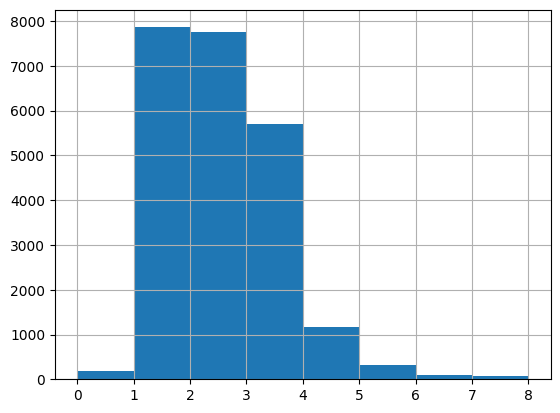

In [131]:
data['rooms'].hist(range = (0, 8), bins = 8)

Чаще всего продавались однушки и двушки, это мы видели и ранее. За ними идут трешки. А вот квартир с большим количеством комнат немного. Студии также редкость.

Изучим данные по высоте потолков:

<AxesSubplot:>

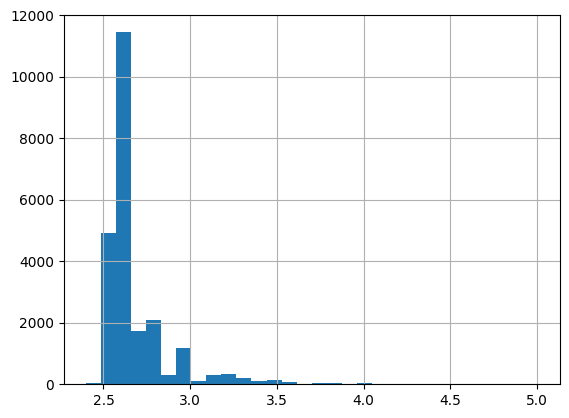

In [132]:
data.ceiling_height.hist(bins = 30)

Больше всего потолков с высотой 2,65м, здесь также "помогли" медианные значения, которыми мы заполнили пропуски. 

Эх, если бы у нас был столбец "год постройки", мы бы точно заполнили пропуски корректно.

Изучим этажи:

<AxesSubplot:>

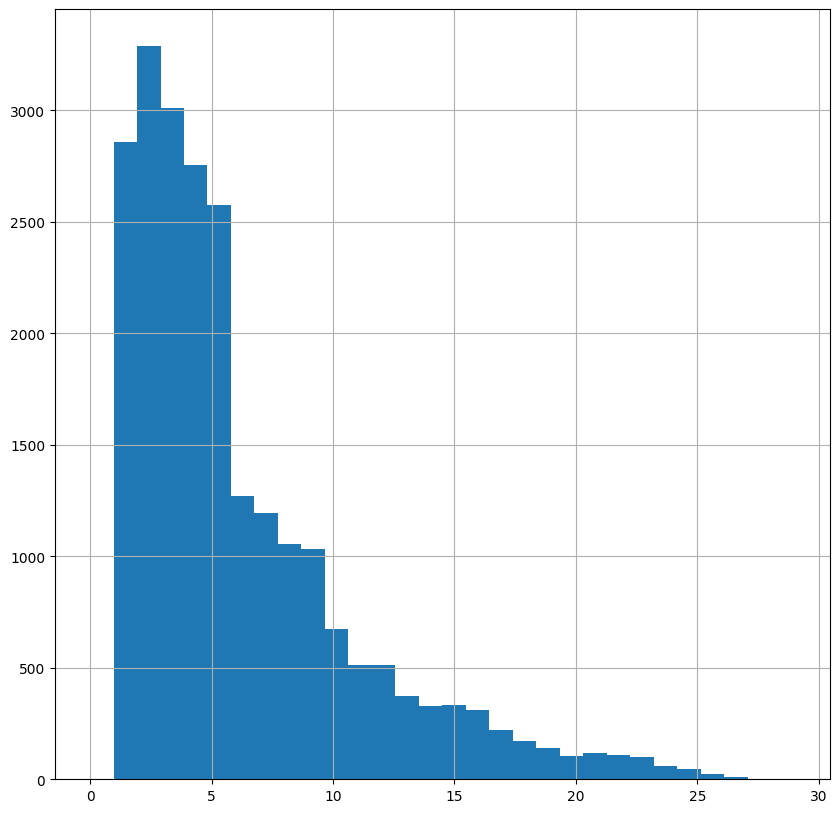

In [133]:
data.floor.hist(bins = 30, range = (0, 29), figsize = (10, 10))

В топ-5 входят первые 5 этажей. Причем на первом месте второй этаж.. Возможно он и правда популярен, однако также известна тенденция не указывать первый этаж первым, чтобы при сортировке (не первый, не последний) квартира не выпадала из общего списка. Возможно здесь виден именно тот случай.

Этажи повыше уже не так популярны, скорее всего в выборке очень много пятиэтажек, которые так влияют на итоговый результат.

Изучим гистограмму по типам этажей:

<AxesSubplot:>

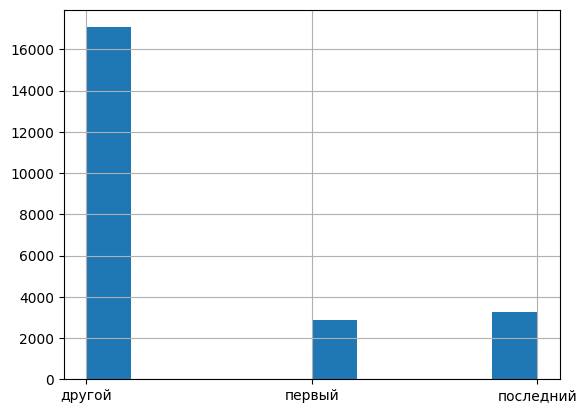

In [134]:
data.type_of_floor.hist()

Почему "другой" здесь вырвался вперед вопросов не вызывает, а вот почему квартир на первом этаже продается несколько меньше, чем квартир на последнем...

Ведь первый этаж чаще рассматривается как место под сдачу в аренду, такие квартиры используют как вложение средств, а значит они должны продаваться чаще. 

Возможно ответ также кроется в желании владельца скрыть настоящий этаж. Ведь если последние этажи могут быть привлекательны отличным видом из окна и отсутсвием соседей сверху, то у первого этажа плюсов крайне мало. Вероятно принадлежность к первому этажу скрывается гораздо чаще, чем к последнему.

Посмотрим на общее количество этажей в доме:

<AxesSubplot:>

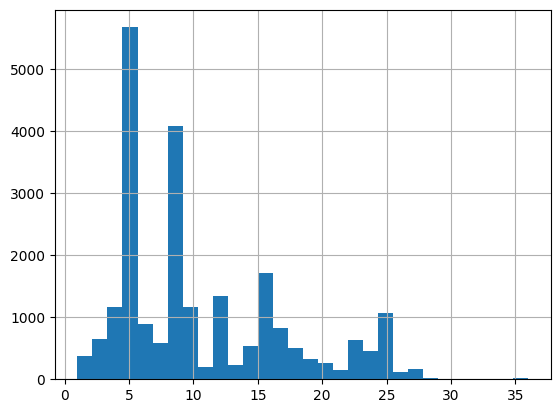

In [135]:
data.floors_total.hist(bins = 30)

График выглядит странно, но, присмотревшись, видим возвышающиеся пятиэтажки, девятиэтажки, а также дома с 12 и 16 этажами. =) 

Домам с другой этажностью сложно победить перед серийными постройками советских времен.

Изучим данные по расстоянию до центра:

<AxesSubplot:>

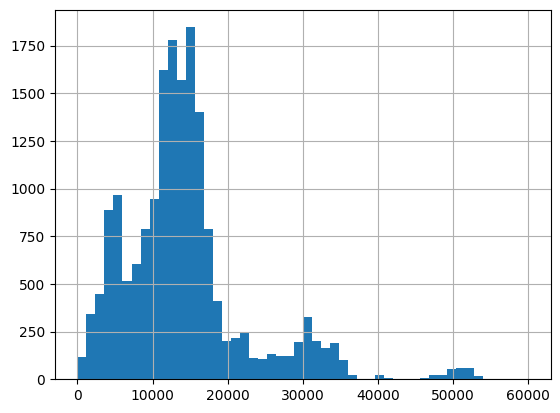

In [136]:
data.cityCenters_nearest.hist(bins = 50, range = (0, 60000))

Для понимания графика обратимся к Яндекс.картам, померим линейкой всё в округе.

Вероятно первый всплеск - это квартиры в самом центре города (возможно район с жилыми кварталами), второй пик - подальше, спальные районы (В пределах 15 км находятся Яново, Кудрово, Шушары). Третий пик, вероятно, более отдаленные районы (Красное Село, Пушкин, Колпино), а последний, вероятно, небольшой городок.

<AxesSubplot:>

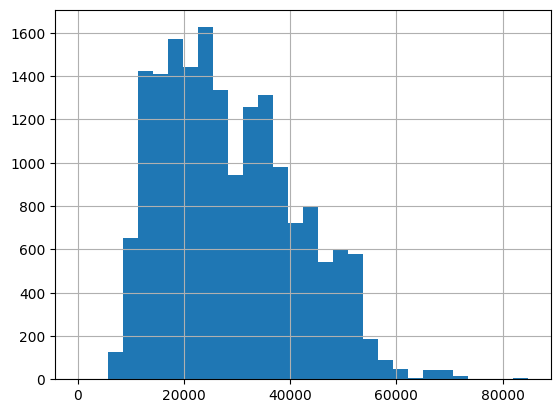

In [137]:
data.airports_nearest.hist(bins = 30)

В 10км от аэропорта находятся как раз самые популярные пригороды, здесь начинается пик. В 20-25км от аэропорта находится сам город. После 40км от аэропорта уже не так много населенных пунктов, а соответстенно продажи жилья невысоки.

Изучим данные по расстоянию до ближайшего парка:

<AxesSubplot:>

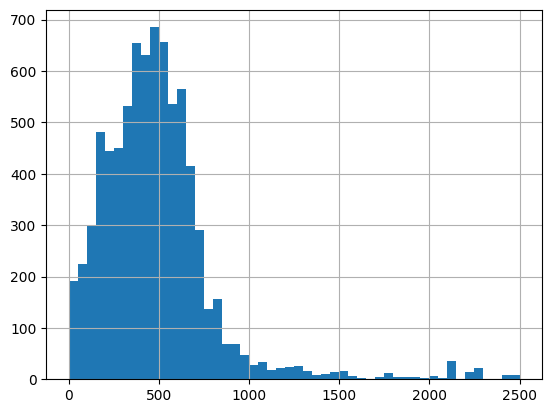

In [138]:
data.parks_nearest.hist(bins = 50, range = (0, 2500))

Чаще всего растояние до парка не превышает 500метров. Это объясняется большим количеством парков в Петербурге. Расстояния более 1км практически не встречаются.

Посмотрим, в какие дни недели чаще всего публикуются объявления:

<AxesSubplot:xlabel='weekday_of_exposition'>

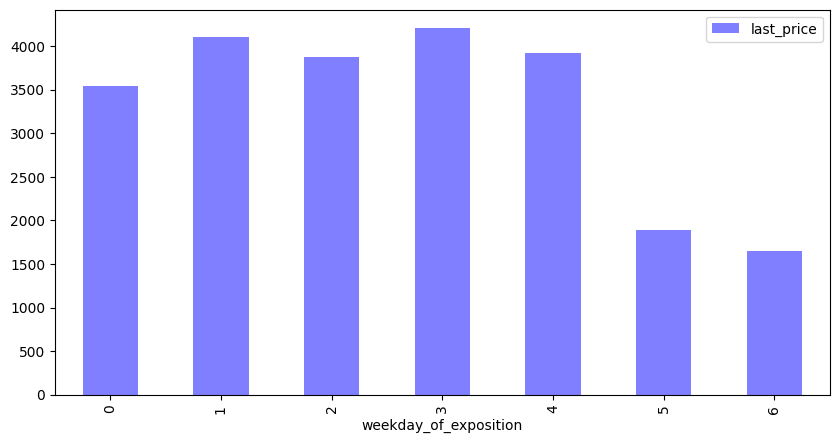

In [139]:
data.pivot_table(index = 'weekday_of_exposition', values = 'last_price', aggfunc = 'count').plot(kind = 'bar', grid = False, color = 'b', alpha = 0.5, figsize = (10,5))

Посмотрим на зависимость месяца от количества публикаций:

<AxesSubplot:xlabel='month_of_exposition'>

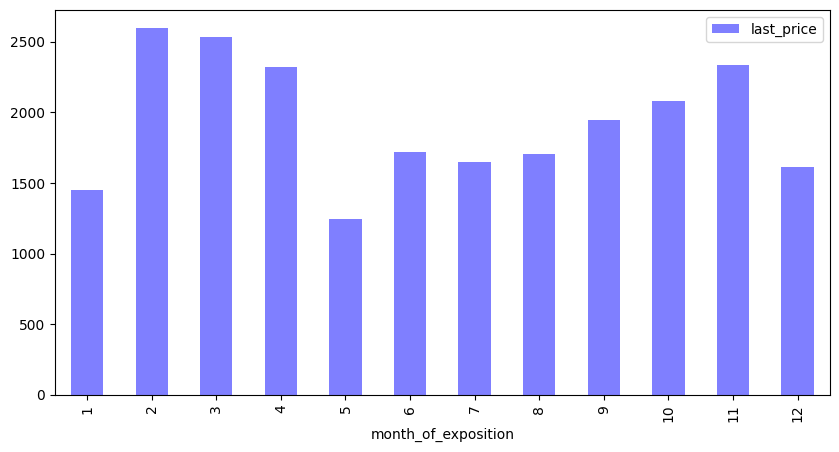

In [140]:
data[['month_of_exposition', 'last_price']].groupby('month_of_exposition').count()\
.plot(kind = 'bar', grid = False, color = 'b', alpha = 0.5, figsize = (10,5))

Во вторник и четверг объявления выкладывают чаще всего. 

Все вполне логично: понедельник - день тяжелый, в этот будний день выкладывают реже всего, вторник обычно называют самым продуктивным днем недели (и наш график такую тенденцию подтверждает), в середине недели других дел полно, в четверг наконец-то решили выложить те, кто откладывал в понедельник и среду. Ну а в пятницу тоже довольно часто ленятся создавать объявление. Не говоря уже о выходных.

Что касается месяцев, по графику видим, что наиболее популярные месяцы для продажи квартир - февраль, март, апрель, ноябрь. В январе и мае все на каникулах, летом всем тоже не до продаж, а вот осень и весна оказались самыми продуктивными сезонами.

**Задание 2**

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
-	Постройте гистограмму.
-	Посчитайте среднее и медиану.
-	В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?


<AxesSubplot:>

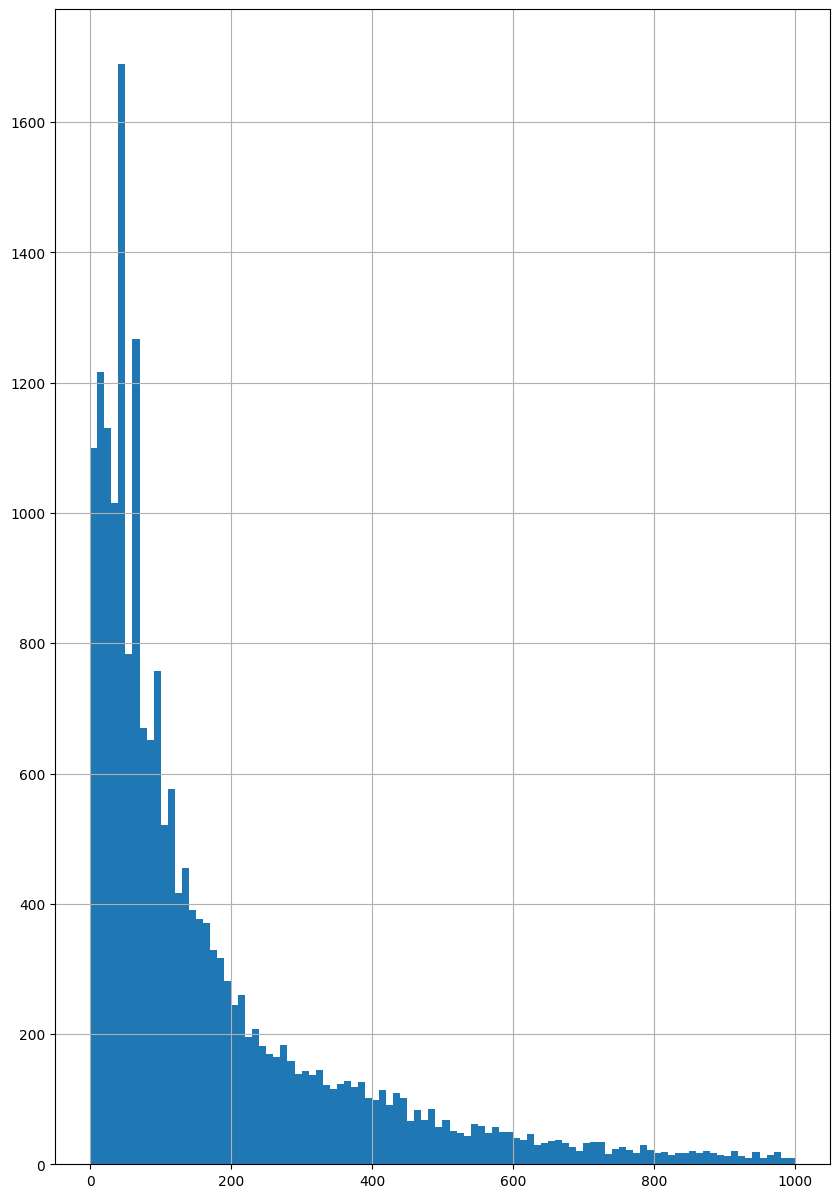

In [141]:
data.days_exposition.hist(bins = 100, range = (0, 1000), figsize = (10, 15))

Видим, что максимальные пики находятся в пределах 70 дней, многие продали квартиру в течение 1-3 месяцев. Чтобы увидеть более точные значения, обратимся к цифрам, а не графику.

In [142]:
data.days_exposition.describe()

count    20069.000000
mean       180.919577
std        219.827090
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

На среднее значение здесь смотреть бесполезно, ведь оно искажается большим количеством строк, которые мы ранее решили оставить, т.к. не знаем, по какой причине так долго висели объявления. Возможно там и правда были очень долгие продажи.

Но мы видим, что медианное значение в отличие от графика уже равно 95 (то есть больше 3х месяцев), а к третьему квартилю достигает значения 231 день. Даже не считая последнего квартиля, где могут быть некорректные данные, можно сделать вывод, что значительное число объявлений провисело на сайте около полугода.

Итак, быстрыми продажами назовем те, которые совершились до 3х месяцев. Долгими продажами - объявления, провисевшие дольше полугода. Необычно долгими назовем продажи от 500 дней (согласно графику).

**Задание 3**


Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
-	общей площади;
-	жилой площади;
-	площади кухни;
-	количества комнат;
-	этажа, на котором расположена квартира (первый, последний, другой);
-	даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.


Ранее мы не удаляли строки с очень дорогими квартирами, однако в случае с зависимостью такие данные исказят график. Удалим их сейчас.

In [143]:
data = data.query('~(last_price > 200000000)')

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

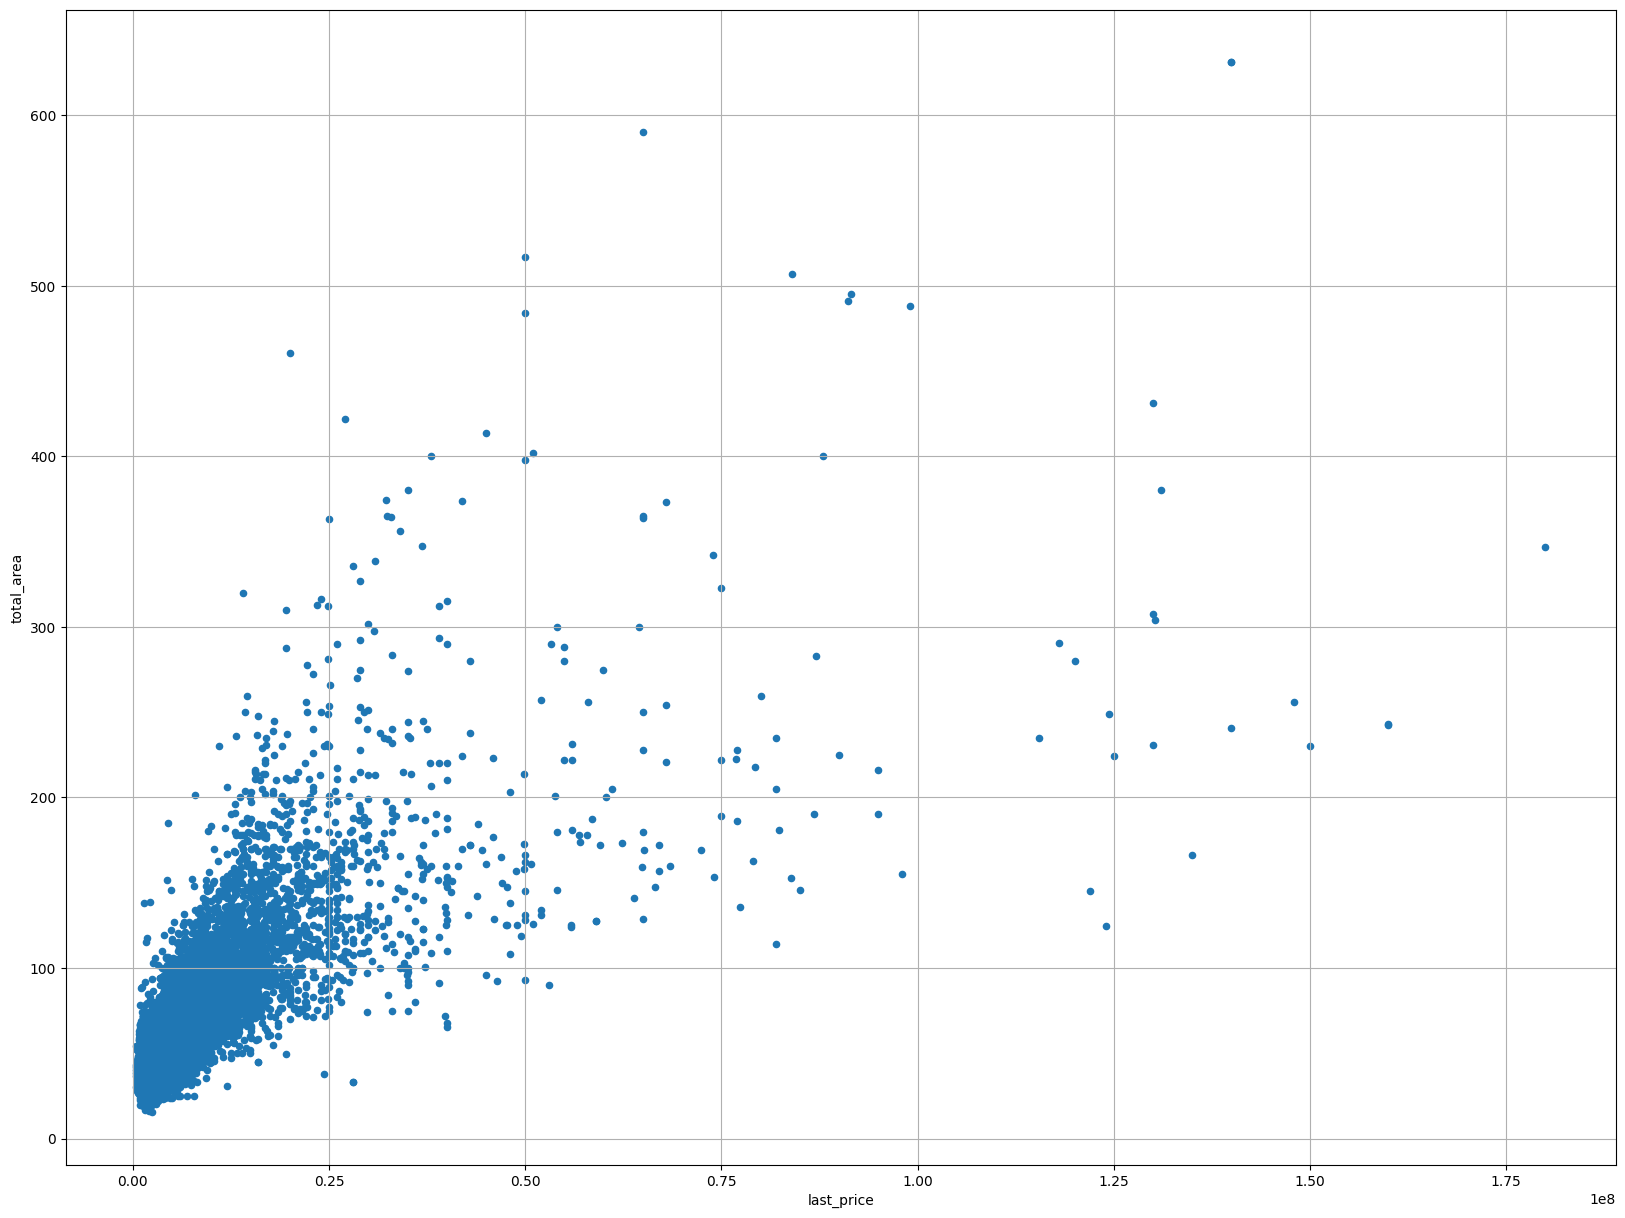

In [144]:
data.plot(kind = 'scatter', x = 'last_price', y = 'total_area', grid = True, figsize = (20, 15))

Видно, что цена прямо пропорциональна площади. Также видна тенденция завышения цены при относительно невысоких площадях (100-200м2)

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

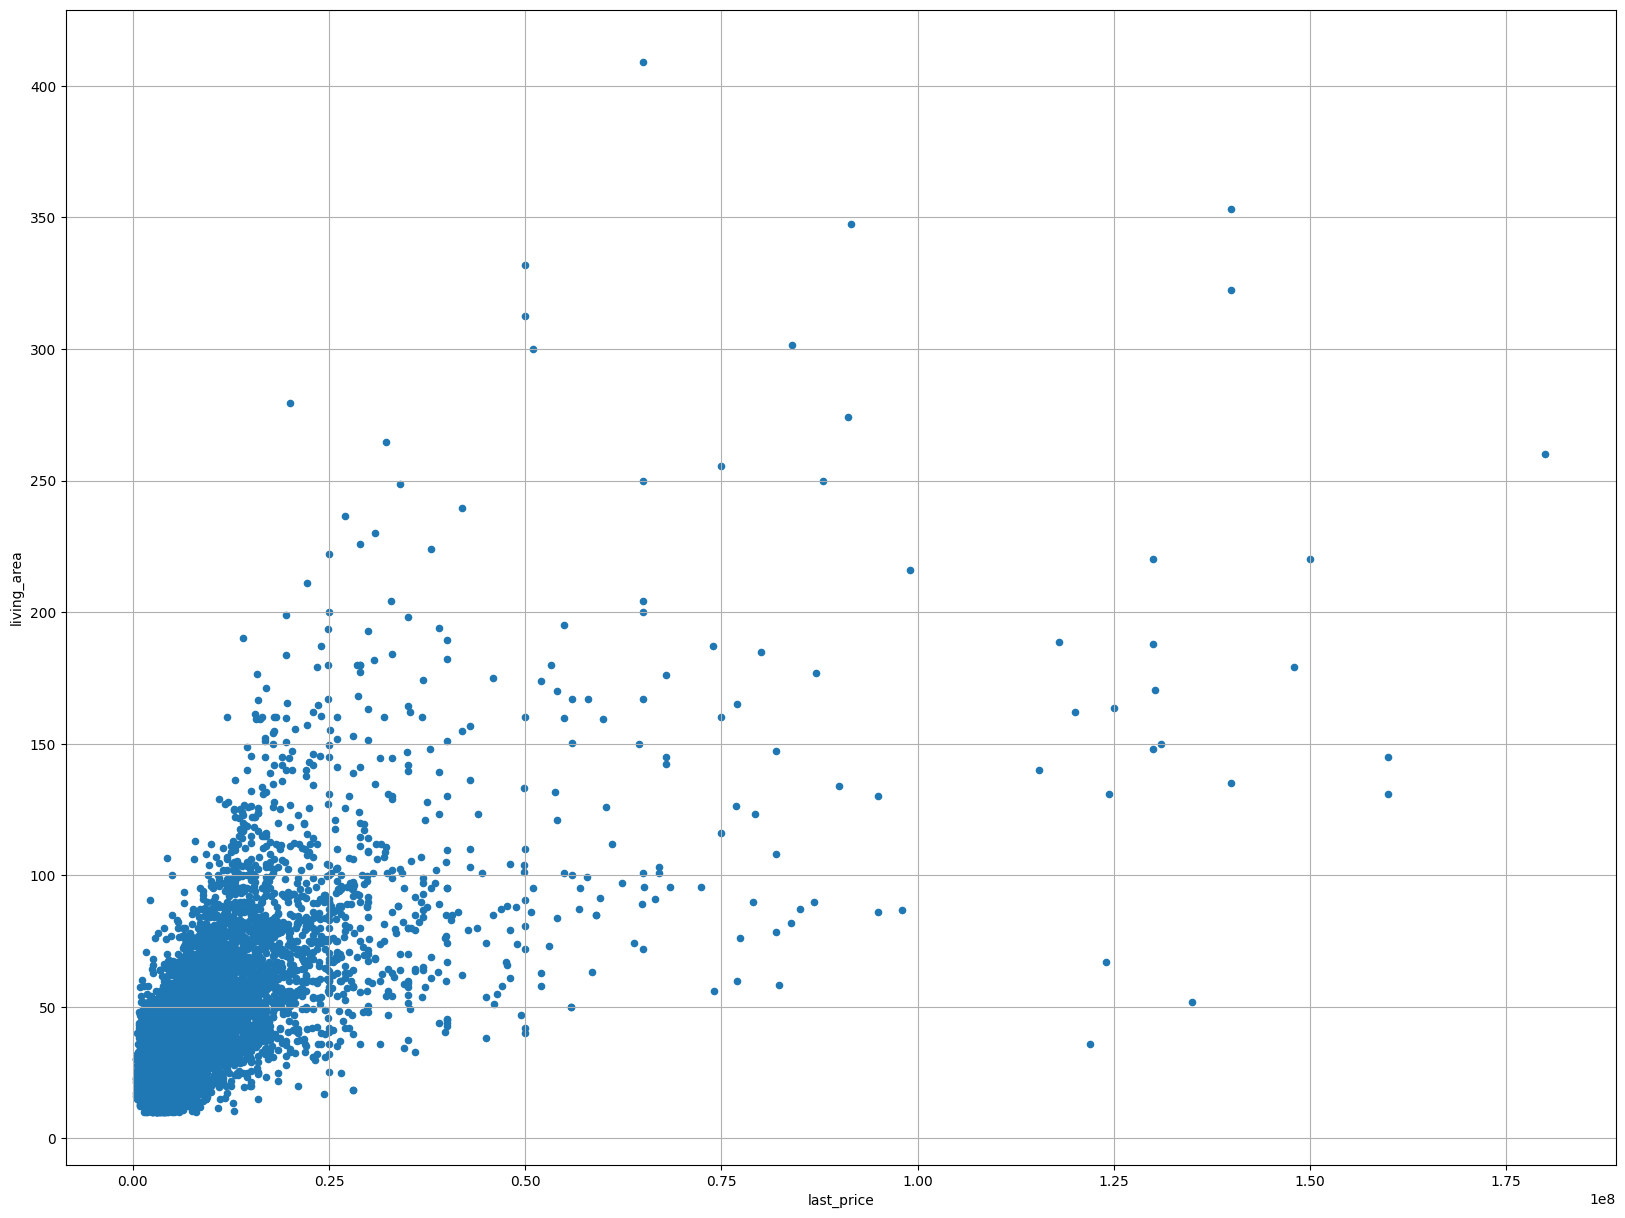

In [145]:
data.plot(kind = 'scatter', x = 'last_price', y = 'living_area', grid = True, figsize = (20, 15))

Зависимость видна в пределах невысоких цен и стандартных размеров площадей

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

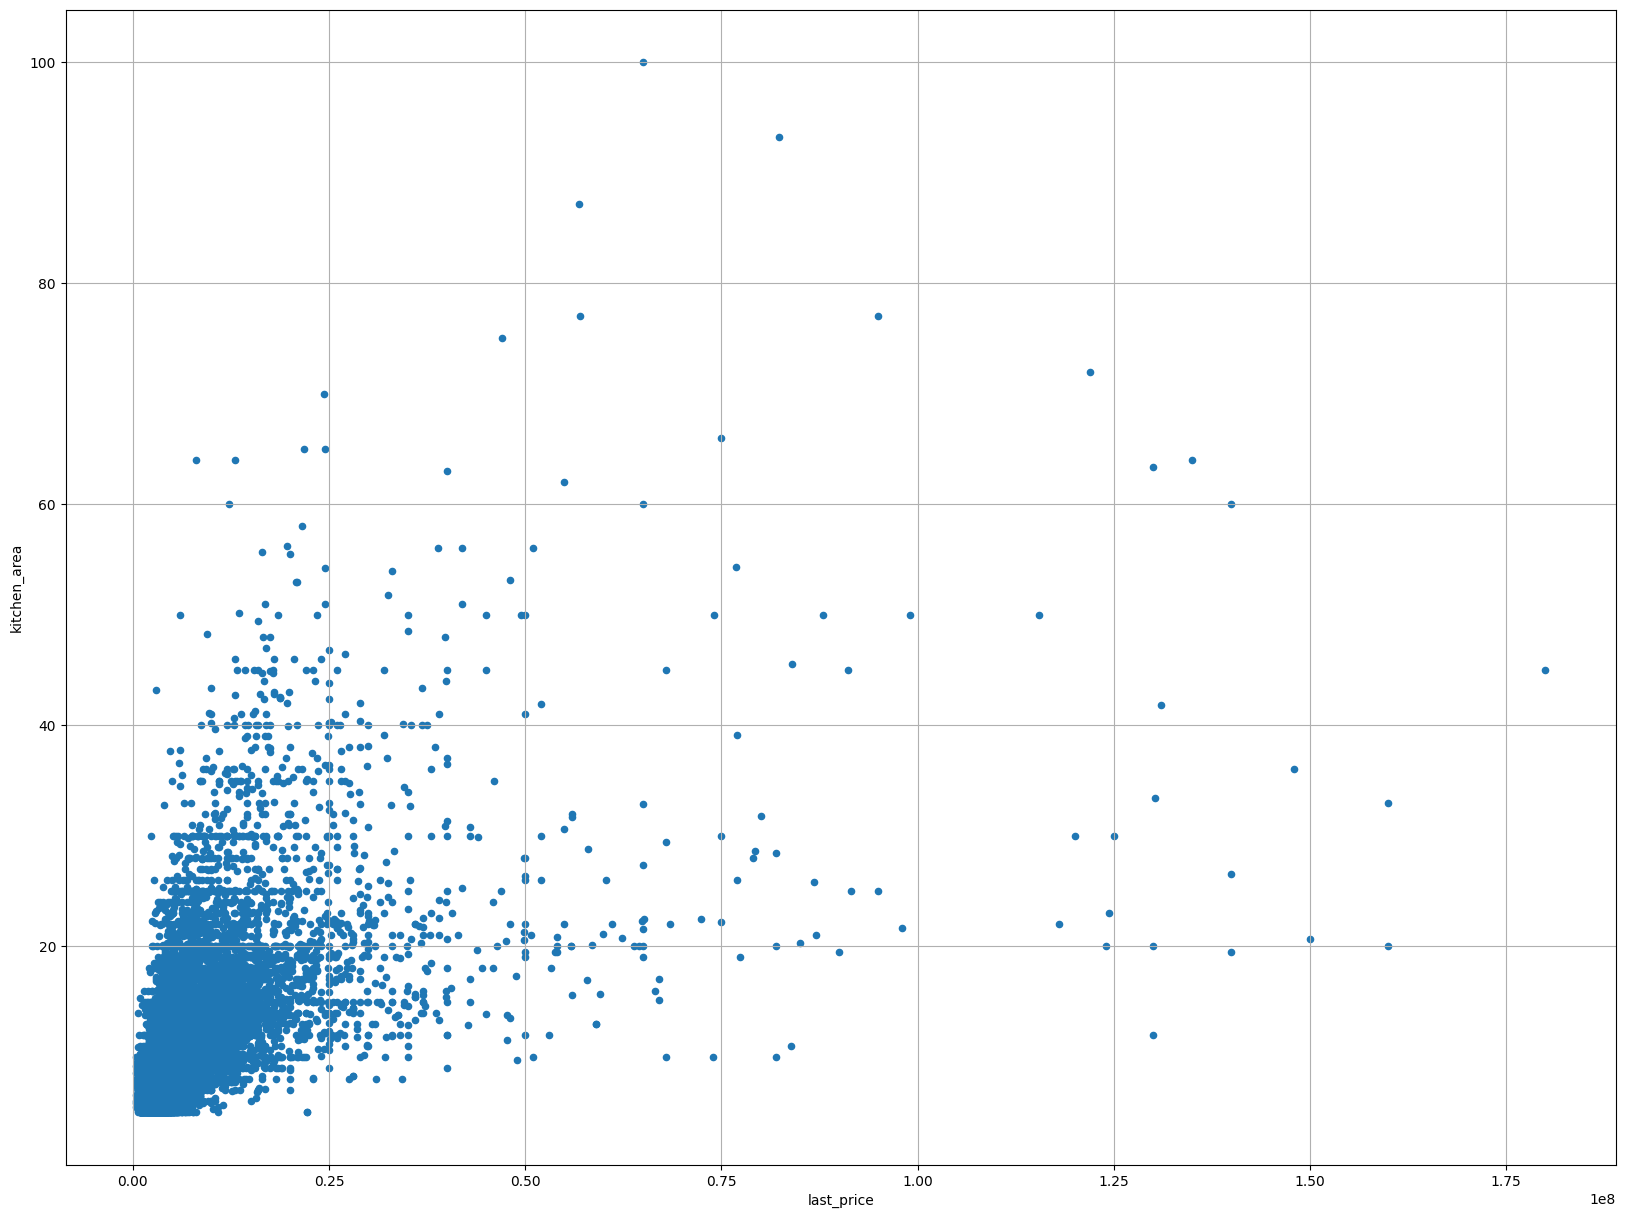

In [146]:
data.plot(kind = 'scatter', x = 'last_price', y = 'kitchen_area', grid = True, figsize = (20, 15))

Площадь кухни не такой однозначный параметр. Она незначительно зависит от цены, при этом видно, что даже при небольшом бюджете можно иметь кухню значительных размеров. Вероятно, это объясняется студиями и квартирами с открытой планировкой, где площадь кухни весьма условна.

<AxesSubplot:xlabel='rooms'>

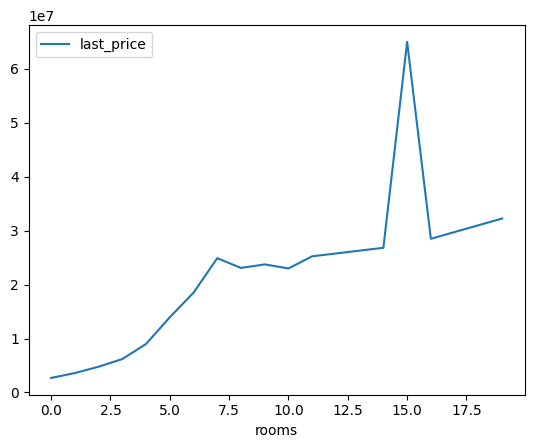

In [147]:
data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot()

Чем больше комнат, тем больше цена. Логично. При этом цена растет довольно активно до семи комнат, дальше, вероятно, количество уже не имеет такое большое значение. На графике также видим выброс у 15-комнатной квартиры, таких было совсем немного, вероятно это одно значение с завышенной ценой так портит нам график.

Попробуем вычислить коэффициент корреляции Пирсона.

In [148]:
print('Коэффициент корреляции Пирсона:', data['rooms'].corr(data['last_price']))
#видим, что слабая корреляция имеется

Коэффициент корреляции Пирсона: 0.4592632857023832


<AxesSubplot:xlabel='type_of_floor'>

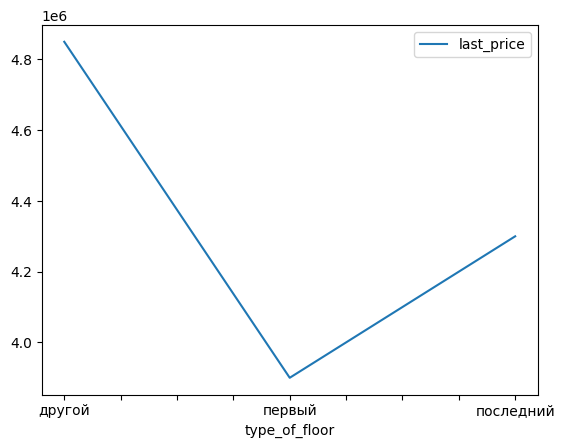

In [149]:
data.pivot_table(index = 'type_of_floor', values = 'last_price', aggfunc = 'median').plot()

Видно, что квартиры вне первого и последнего этажа имеют большую цену, тогда как квартиры на первом этаже самые дешевые.

Посмотрим на зависимость года от цены:

In [150]:
data.pivot_table(index = 'year_of_exposition', values = 'square_meter_price', aggfunc = 'median')

,square_meter_price
year_of_exposition,
2014,106803.800
2015,93051.450
2016,91743.120
2017,92560.355
2018,95744.680
2019,103328.875


<AxesSubplot:xlabel='year_of_exposition'>

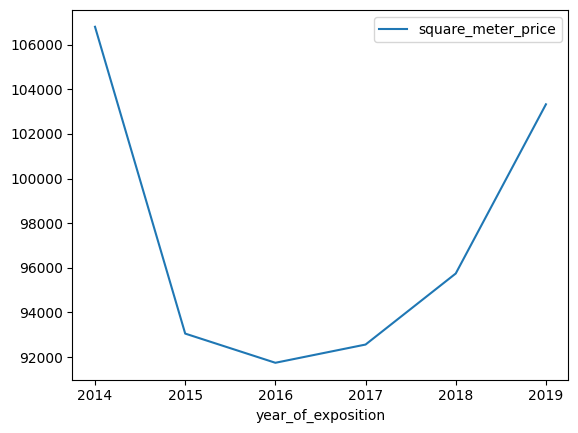

In [151]:
data.pivot_table(index = 'year_of_exposition', values = 'square_meter_price', aggfunc = 'median').plot()

Здесь мы видим очень высокую цену за кв.м в 2014 году, далее падение с 2015 по 2017, затем рост вплоть до 2019 года.

Рост в последние годы можно объяснить урбанизацией, притоком населения в крупные города итд. А большие значения 2014 скорее всего обусловлены экономическим кризисом и ажиотажем того года.

Посмотрим на зависимость месяца от цены:

<AxesSubplot:xlabel='month_of_exposition'>

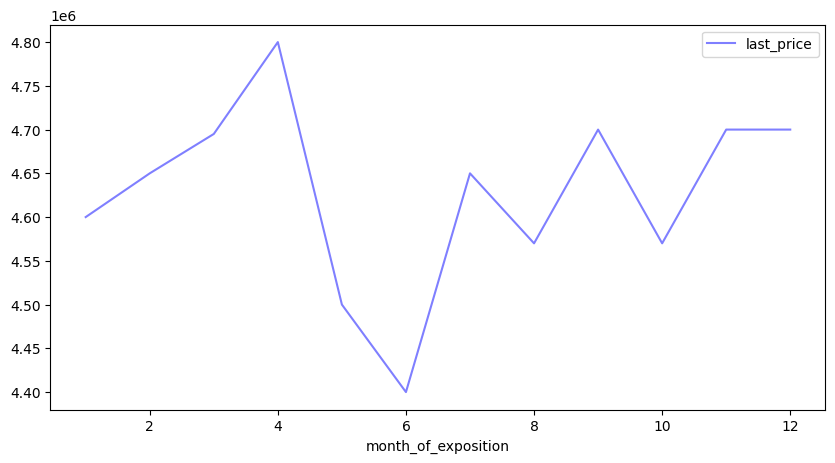

In [152]:
data[['month_of_exposition', 'last_price']].groupby('month_of_exposition').median().plot(kind = 'line', grid = False, color = 'b', alpha = 0.5, figsize = (10,5))

Самые низкие цены на квартиры в мае и июне, хотя разница в ценах не так невелика. Возможно это объясняется спадом продаж в эти месяцы. Посмотрим, сколько объявлений было выложено в каждый из месяцев.

Посмотрим, зависит ли цена от дня публикации объявления:

<AxesSubplot:xlabel='weekday_of_exposition'>

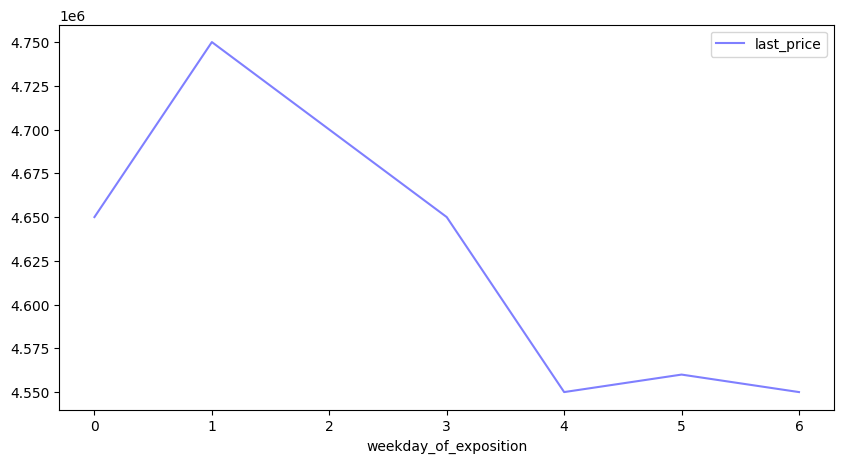

In [153]:
data.pivot_table(index = 'weekday_of_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'line', grid = False, color = 'b', alpha = 0.5, figsize = (10,5))

Цена квартиры от дня публикации объявления немного зависит, по вторникам цены ставят выше. Возможно это объясняется тем, что по вторникам чаще публикуются объявления и разброс цен становится выше.

Зависимость по нескольким числовым параметрам мы также можем посмотреть на heatmap.

<AxesSubplot:>

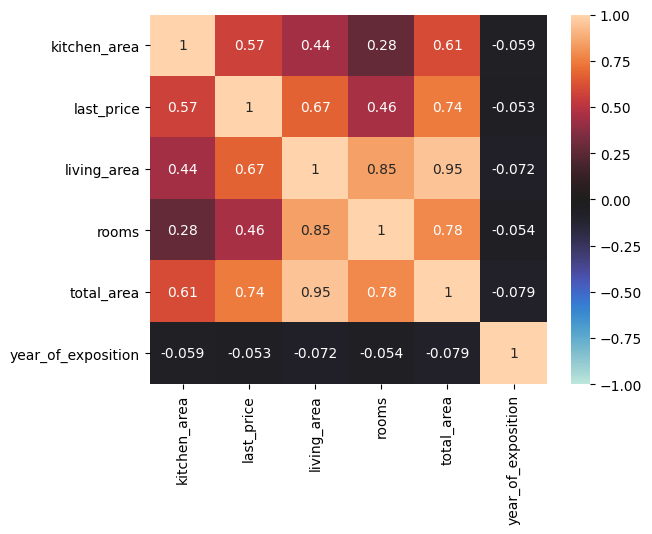

In [154]:
data_corr = data.pivot_table(index = data.index, values = ['last_price', 'total_area','living_area', 'kitchen_area', 'rooms', 'type_of_floor', 'year_of_exposition'], aggfunc = ('mean'))
sns.heatmap(data_corr.corr(), annot = True, vmin=-1, vmax=1, center= 0)

Таким образом, построив графики, мы видим, что на цену влияют сразу несколько факторов.

Наибольшая корреляция найдена с площадями (общей, жилой, кухонной).

Также видна зависимость между ценой и количеством комнат, расположением на определенном этаже, годом.

Немаловажным фактором станет время размещения объявления. Можно рекомендовать пользователям продавать квартиры "в сезон" - весной и осенью, а также выкладывать объявления по вторникам и четвергам - так шансов, что вас увидят больше =) И цену можно немного завысить.

**Задание 4**	

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

Посмотроим сводную таблицу:

In [155]:
top10 = data.pivot_table(index = 'locality_name', values = 'square_meter_price',\
                         aggfunc = ('mean', 'count')).sort_values(by = 'count', ascending = False).head(10).reset_index()
top10

,locality_name,count,mean
0,Санкт-Петербург,15406,113858.027476
1,Мурино,573,85868.809791
2,Кудрово,466,95247.578133
3,Шушары,434,78614.754055
4,Всеволожск,392,68732.836786
5,Пушкин,361,103007.449114
6,Колпино,333,75399.129339
7,Парголово,327,90175.913089
8,Гатчина,296,68856.523243
9,Выборг,234,58285.918162


Построим график:

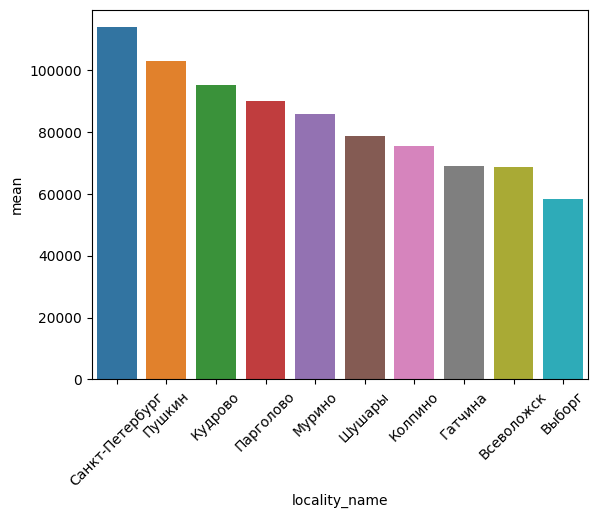

In [156]:
ax = sns.barplot(x = top10['locality_name'], y = round(top10['mean'],0), data = top10, order = top10.sort_values( 'mean' ,ascending = False ).locality_name)
plt.xticks(rotation = 45)
plt.show()

Итак, самые высокие цены за квадратный метр в Санкт-Петербурге, а самые низкие в Выборге.

**Задание 5**	

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

Соберем сводную таблицу:

In [157]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_km', values = 'square_meter_price', aggfunc = 'mean')

,square_meter_price
cityCenters_km,
0.0,231767.956154
1.0,159833.617676
2.0,151829.974884
3.0,121350.742899
4.0,130518.055890
5.0,137507.690258
6.0,146728.217828
7.0,154410.309510
8.0,124006.537795


Построим график:

<AxesSubplot:xlabel='cityCenters_km'>

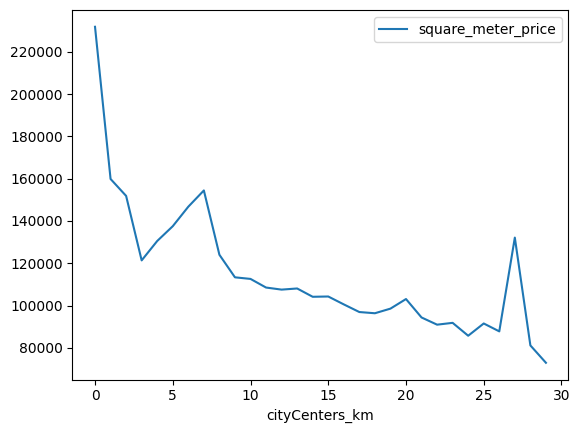

In [158]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_km', values = 'square_meter_price', aggfunc = 'mean').plot()

На графике мы видим,что максимальный пик приходится на ближайшие к центру квартиры, здесь цены могут быть свыше 220 тыс. за кв.метр. Довольно высокие значения на уровне 150 тыс. за кв. м наблюдаются в пределах 2,5 км от центра, здесь также плотная жилая застройка. А после 3 км начинается спад, т.к. здесь расположен Адмиралтейский район с большим количеством промышленных объектов. На расстоянии около 5-7 км видим снова подъем цен, здесь находится Кировский район, в котором активно ведется строительство новой недвижимости. Далее идет постепенный спад цен. В районе 27 км наблюдается пик в 130 тыс. за кв.м, но поскольку частота объявлений в этом районе заметно снизилась, скорее среднее  значение на этот километр задает какая-то одна довольно дорогая квартира, не будем обращать на этот выброс внимание.

### Общий вывод

Итак, перед нами стояла задача проанализировать выборку объявлений 2014-2019 года о продаже квартир на сервисе Яндекс.Недвижимость.
Для получения качественных данных нам потребовалось очистить исходные данные от аномалий и пропусков, сменить типы данных в столбцах, устранить дубликаты в текстовом столбце, а также добавить дополнительные столбцы с важными признаками.

По итогу предобработки мы лишились всего 0,02% данных от общего объема.

В ходе исследовательского анализа мы рассмотрели детально каждый признак, отметили тенденции и выявили закономерности:

**-	общая площадь**

Наиболее популярная площадь квартиры - около 45 кв.м. Вторая по популярности площадь - около 60 кв.м.. Скорее всего это обусловлено большим количеством типовых квартир советской постройки, где 45 квадратных метров - это типичная двушка, а 60 - трешка. Сюда же, вероятно, накладываются и современные квартиры, в которых площадь уже больше. Таким образом современные однушки в 45 квадратов сливаются с двушками советских времен.

**-	жилая площадь**

Поскольку жилая площадь напрямую зависит от общей, в целом их графики схожи, однако пики на графике не совпадают, вероятно это связано с увеличением кухни в стандартных квартирах с большей площадью, а значит уменьшением жилой площади. Тогда как в самых популярных 45-метровых квартирах кухня минимальна, а значит жилая площадь больше.

**-	площадь кухни**

Чаще всего площадь кухни в пределах 7-12 квадратных метров. Маленькие кухни также присутствуют, но в небольшом количестве. После 10 кв.м. график идет на спад, хотя в сравнении с графиком общей площади можно было бы увеличить размеры кухни. Можно сделать вывод, что на кухнях стараются сэкономить пространство в пользу других жилых помещений.

**-	цена объекта**

Наиболее часто встречаются цены около 4 млн. Цены ниже тоже встречаются, но их гораздо меньше. Скорее всего такие квартиры будут располагаться на окраинах, в небольших городах и поселках, а поскольку густота населения города несравнима с сельской местностью, объявлений о продаже в городе тоже больше, поэтому цены выше среднего встречаются в выборке даже чаще минимальных.

**-	количество комнат**

Чаще всего продавались однушки и двушки (отрыв между ними небольшой). За ними идут трешки. А вот квартир с большим количеством комнат мало.

**-	высота потолков**

Самая популярная высота - 2,65, на втором месте "классика" 2,5. А вот квартир с потолками выше гораздо меньше.

**-	этаж**

В топ-5 входят первые 5 этажей. Причем на первом месте второй этаж. Возможно он и правда популярен, однако также известна тенденция не указывать первый этаж первым, чтобы при сортировке квартира не выпадала из общего списка. Возможно здесь виден именно тот случай. Этажи повыше уже не так популярны, скорее всего в выборке очень много пятиэтажек, которые так влияют на итоговый результат.

**-	тип этажа квартиры («первый», «последний», «другой»)**

Больше всего квартир не на первом и не на последнем этаже. Последний этаж оказался популярнее первого, таких квартир больше.

**-	общее количество этажей в доме**

Чаще всего в объявлениях встречаются квартиры в пятиэтажках, девятиэтажках, двенадцати- и шестнадцатиэтажных домах.

**-	расстояние до центра города в метрах**

Больше всего объявлений по квартирам в самом центре города, второй пик в пределах 15 км (здесь как раз находятся популярыне районы Яново, Кудрово, Шушары). Третий пик, вероятно, более отдаленные районы (Красное Село, Пушкин, Колпино).

**-	расстояние до ближайшего аэропорта**

В 10км от аэропорта находятся как раз самые популярные пригороды, здесь начинается пик. В 20-25км от аэропорта находится сам город. После 40км уже не так много населенных пунктов, а соответстенно объявлений меньше.

**-	расстояние до ближайшего парка**

Чаще всего расстояние до ближайшего парка около 500 метров. Это объясняется тем, что отмечать расстояние до парка можно только в объявлениях для Санкт-Петербурга.

**-	день и месяц публикации объявления**

Больше всего объявлений размещают по вторниками и четвергам. Что касается месяцев, то наиболее популярные месяцы для продажи квартир - февраль, март, апрель, ноябрь.


**Изучение параметра days_exposition**

В ходе исследования мы изучили, как быстро продавались квартиры.
Согласно графику больше всего квартир продали в срок около 70 дней.
Медианное же значение равно 95 (больше 3х месяцев), а значение в третьем квартиле - 231 день.
Поэтому быстрыми продажами можно назвать те, которые совершились до 3х месяцев. Долгими продажами - объявления, провисевшие дольше полугода. Необычно долгими - продажи от 500 дней.

**Изучение влияния отдельных параметров на цену объекта**

Мы выяснили, что на цену влияют сразу несколько факторов.

Наибольшая корреляция найдена с площадями квартир (общей, жилой, кухонной).

Также видна зависимость между ценой и количеством комнат, расположением на определенном этаже, годом.
Немаловажным фактором станет время размещения объявления. В мае и июне рынок недвижимости замирает, поэтому квартиры публикуются с ценой ниже. Осенью и весной квартиру продать можно дороже. 


**Топ-10 городов по стоимости квадратного метра**

Выбрав наиболее популярные города по количеству объявлений, мы оценили цены за квадратный метр в каждом насленном пункте и выяснили, что самая дорогая недвижимость в Санкт-Петербурге (около 110тыс за кв.м.), а самая бюджетная - в Выборге (60 тыс. за кв.м.)

**Стоимость квартир по расстоянию до центра**

Самые высокие цены ожидаемо на самые ближайшие к центру квартиры (до 300 тыс за кв.м.). Довольно высокие значения на уровне 170 тыс. за кв. м. наблюдаются в пределах 25 км от центра, далее на окраинах цены снижаются. На расстоянии около 60-75 км цены снова поднимаются, здесь находятся сателиты Санкт-Петербурга, самостоятельные городки со своей инфраструктурой, это уже не окраина города, поэтому и цена выше.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод